# Proposal of SCOPE Analysis: Aerial Palm Tree Counting Project

Notes: In this project exploratory analysis i use terms of *"projected"* as the indication for synthetization of data or rough assumptions, only for the project exploratory simulations purposes (contextual awareness and objective alignment), the actual facts and validity might actually far from accurate representative of SawitPro company

## S: Stakeholder Requirements & Success Criteria

### Primary Stakeholders:
- **Primary Stakeholders**: PT Digital Sawit Pro (SawitPro)
- **Plantation Manager**: Requires automated palm tree plantation quantity data for harvest planning (*projected*)
- **Agricultural Officers**: Track and Monitor plantation's growth or decline
- **Financial Department**: Require the data for asset analysis and valuation (*projected*)

### Business Success Definition:
- AI Model of Aerial Tree Counter accuracy reach at least 80% of Coverage (*projected*)
- Automated track of changes of specific landscape of plantation growth and disposal over certain period of times
- Generating automated aerial distribution maps for palm tree plantation management

### Error Tolerance:
- **Type I errors (False Positives)**: Medium tolerance
  - *Business Impact*: Over-Preparation of harvesting operation
  - Business Mitigation: Abundance of cost is still recoverable and reallocate-able (*projected*)
- **Type II errors (False Negatives)**: High tolerance
  - *Business Impact*: Losing full potential of plantation harvesting
- **Conclusion: 
	- Recall (Coverage) over Precision (Quality)
	- Over-Preparation < Under-Preparation (*projected*)

### Interpretability Requirements:
- Requires Image visualizations and quantity result for further validation
- Providing confidence scores for least ambiguous detection

```
Conclusion of Success Criteria (projected):
1. Maximize coverage of detected palm trees
2. Keep Maintaining Quality of detection
3. Develop robust AI model for better generalization on highly heterogenous condition of nature
4. Identify obscure area that hardly to yields accurate automatic detection
```

## C: Constraints & Context

### Computational Resources:
- **Training**: 
	- Low-performance GPU cluster at Engineer compute station (*projected*)
- **Inference**: 
	- Mid or Edge Device at plantation unit probably in remote locations with limited connectivity
	- Not requires of object tracking system as palm tree is a still object, which requires quality of coverage detection rather than fastest inference speed 
- **Field Use**: For Laptop or Mobile device that processing aerial images from drone (*projected*)

### Deployment Environment:
- Primary: Cloud-based processing pipeline
- Secondary: Laptop or Mobile Devices for offline processing
- Future consideration: 
	- Hybrid Cloud-based for main inference and local Model for backup inference mitigation
	- Drone as Computational Edge device 

### Response Time Requirements:
- Job Processing or minimum delayed inference is still acceptable
- Inference Speed at least of 1 FPS on all target machines

### Data Constraints:
- Palm Tree Object Characteristic
	- Palms Tree Overlapping nature due to dense plantation setup
	- Non-Complex nature of pattern from palm tree especially from top angle 
	- Various size or scale of the palm tree
- Environment Characteristic
	- Aerial imagery from drones or helicopter
	- Variation of Scale and Resolution of images
	- Natural illumination, bush, foliage, similar plant and other object
	- Palm Tree Occlusion with shadows or other similar Trees
	- Potentially Mixed with other plants or vegetation
- Contextual Consideration
	- Limited training data (~500 manually annotated images) that sourced from public object detection dataset from *Roboflow*

## O: Objectives & Optimization Targets

### Primary Metric:
- Recall (AR) across different tree densities (IOU overlapping: 0.5, 0.7, 0.9)
### Secondary Metrics:
- Average Precision (AP) at high recall point (> 0.9) finding best coverage with best quality
- F1 score for tree detection (balancing precision and recall) since the detection consist of single class target
- Inference time per image

### Performance Thresholds:
- **Minimum Acceptable**: 
	- R > 80%
	- AP > 70%
- **Target**: F1 > 0.7
- **Stretch Goal**: F1 > 0.85 

### Acceptable Trade-offs:
- Recall > Precision (Precision can be sacrifice reasonably)
- Quality > Speed (Inference time can be sacrifice at extend)
- Small Model Size < Large Model Size (The Model needs to be deploy on mid to edge devices)
- Low computational Limit resulting long duration span of training process due to hardware constraint (*projected*)

```
Optimization Priority Order:
1. Recall (Detection Coverage)
2. Precision (Detection Quality)
3. Model size efficiency
4. Inference speed
```

## P: Problem Characteristics

### Problem Type:
- Object detection of palm tree in aerial imagery with counting capability
- Monitoring plantation changes over time (*predicted*)

### Data Characteristics:
- **Volume**: aerial images covering more than 1 hectares
- **Dimensions**: High-resolution 5954 x 6978 from 41.5 MP camera source
- **Distribution**: 
  - Manual Human Counting approximately 615 trees relatively in the center of the image and 105 trees spread across the border of the image in total of 720
  - Imbalanced tree density in certain area
  - Variable tree size and scale
  - Significant tree overlapping across plantation
  - Some irregular pattern or blank spot (adjacent with river pond, flat ground, etc.)
  - Some occlusion with other species of trees or bush

### Special Considerations:
- Seasonal variations (rain and sunny) affecting natural color and shade significantly between different season (predicted)

### Domain-Specific Factors:
- Knowledge Seasonal behaviors of trees different growth
- Plantation layout management approach and their impact on tree occlusion

## E: Evaluation Strategy

### Validation Approach:
### A. Dataset Splitting
- **Training Set**: 90% of the data for training
- **Validation Set**: 5% of the data for hyperparameters tuning.
- **Test Set**: 5% of the data for final evaluation
### B. Cross-Validation
- **K-Fold Cross-Validation**: If the dataset is large enough, use k-fold cross-validation

### Testing Methodology:
### A. A/B Testing
- **Implementation**: Compare the baseline model against alternative model
- **Metrics to Compare**: Use F1, AR, and AP to evaluate performance gap.
### B. Validation
- **Validation**: Conduct manual labeling of palm tree number to validate model predictions

### Monitoring Plan:

### A. Performance Monitoring
- **Real-Time Monitoring**: Set up dashboards to monitor performance metrics in training progress
### B. Feedback Collection
- **User  Feedback**: Gather input from SawitPro Plantation Manager regarding of model reliability.
- **Iterative Improvements**: Use monitoring metric to refine the model and retrain with new dataset improvement.

### Maintenance Strategy:
- **Retraining Schedule**: Schedule the regular model updates to incorporate new data and model improvement regarding to SawitPro computational power

## AI Model Development Approach Selection Framework

## Project Requirements:
1. **Time Constraints**: < 1 Week
2. **Team Expertise**: Software Engineers with some ML or General Developers
3. **Use Case Complexity**: Standard Object Detection (Not for research purpose)
4. **Data Availability**: Medium Dataset (500-1000 images)
5. **Deployment Environment**: Edge Devices, Mobile Applications, Cloud Services

**Balance development speed vs. performance needs**:
   - MMDetection Model Toolbox
   - Model API Frameworks (Ultralytics)

## Detailed Analysis by Confidence Threshold

| Threshold | Precision | Recall | F1 Score | mAP50 | Analysis                                     |
| --------- | --------- | ------ | -------- | ----- | -------------------------------------------- |
| 0.1       | 0.939     | 0.878  | 0.908    | 0.931 | Highest recall, highest F1, highest mAP50    |
| 0.2       | 0.939     | 0.868  | 0.902    | 0.924 | Slight decrease in recall and F1             |
| 0.3-0.4   | 0.953     | 0.849  | 0.898    | 0.915 | Improved precision, further decreased recall |
| 0.5       | 0.957     | 0.849  | 0.900    | 0.917 | Slight improvement in F1 over 0.3-0.4        |
| 0.6       | 0.976     | 0.774  | 0.863    | 0.883 | Significant drop in recall and F1            |
| 0.7       | 1.000     | 0.717  | 0.835    | 0.858 | Perfect precision but lowest recall and F1   |
|           |           |        |          |       |                                              |
|           |           |        |          |       |                                              |
|           |           |        |          |       |                                              |

Model Tuning Result:
1. Recall: 0.878
2. Precision: 0.939
3. F1 Score: 0.908
4. MAP-50: 0.931
5. mAP50-95:  0.699
6. Model size efficiency
7. Inference speed: 
	1. 55.73ms on Small 640x640 image 
	2. 2.66 s/im on Huge Aerial Stitched Image with Sliding Windows
8. Real Case Detection: Found 654 Tree Out of 720 (Human Count)

In [ ]:
# Importing Necessary Packages
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage
from ultralytics.utils.benchmarks import benchmark
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
# Importing Dataset From Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("aerial-palm-tree").project("palm-tree-detection-c4stq-1a2p7")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Palm-Tree-Detection-1 in yolov11:: 100%|██████████| 1002/1002 [00:00<00:00, 4450.49it/s]


In [2]:
#load dataset and model selection
dataset_path = "/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/data.yaml"
model = YOLO("yolo11n.pt")  # load a pretrained model (trained on general multi class COCO dataset)

In [ ]:
#Start the training process
results = model.train(data=dataset_path, epochs=150, imgsz=640, plots=True)

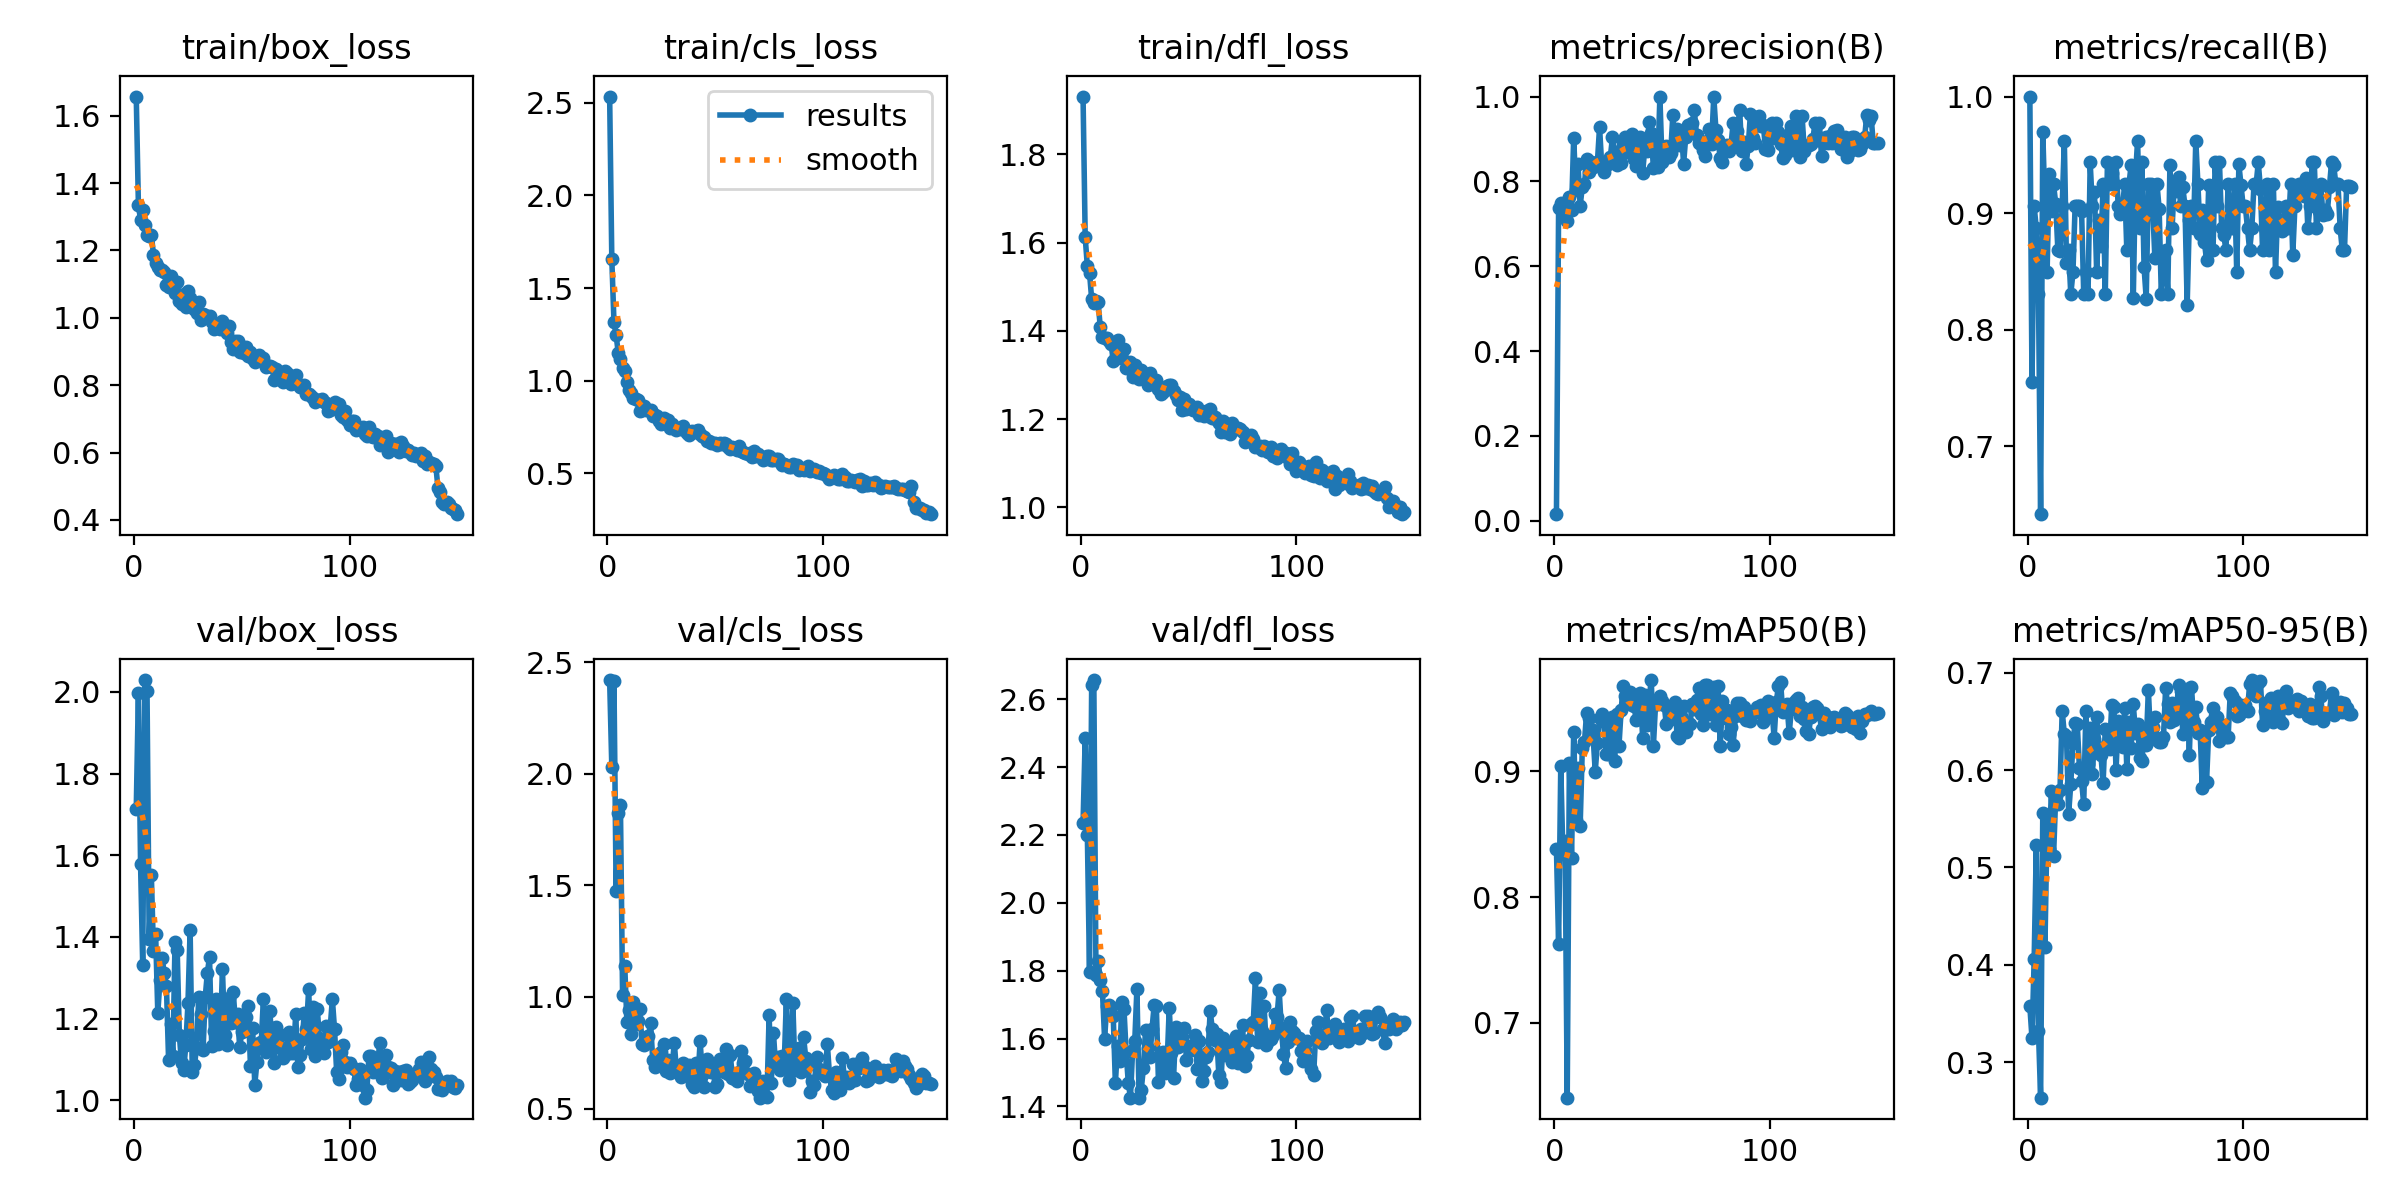

In [7]:
# Overall Training Metrics Result 
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/results.png', width=600)

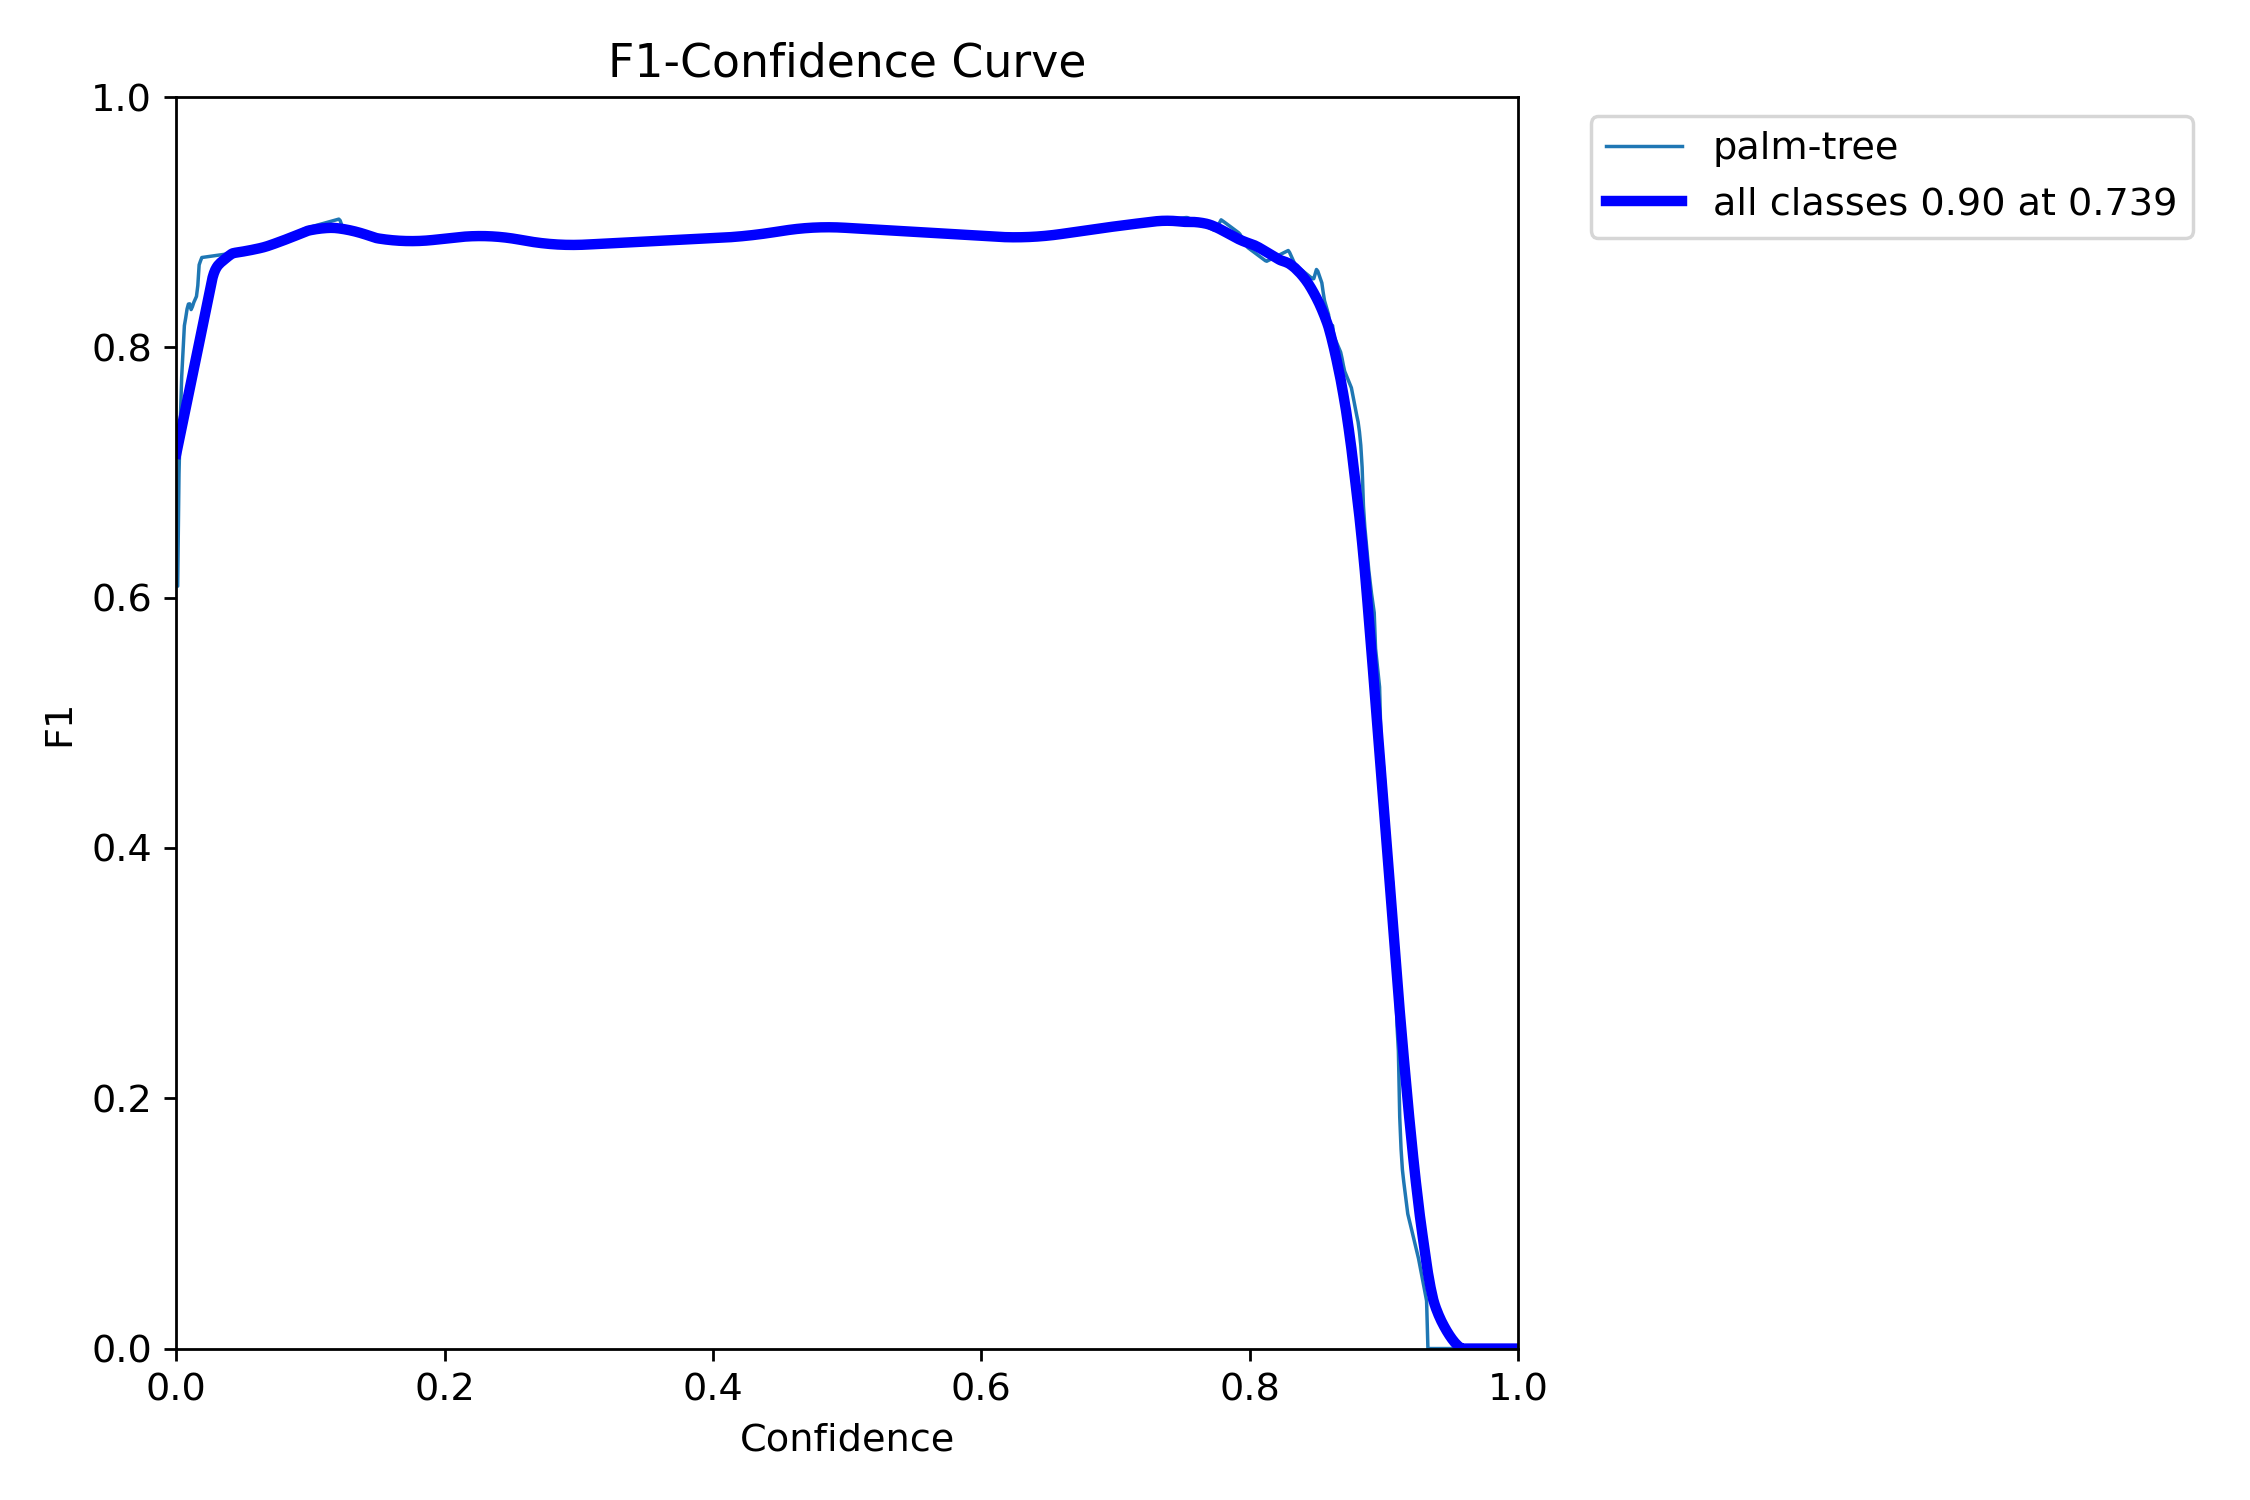

In [11]:
# F1 Curve Metrics Result 
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/F1_curve.png', width=600)

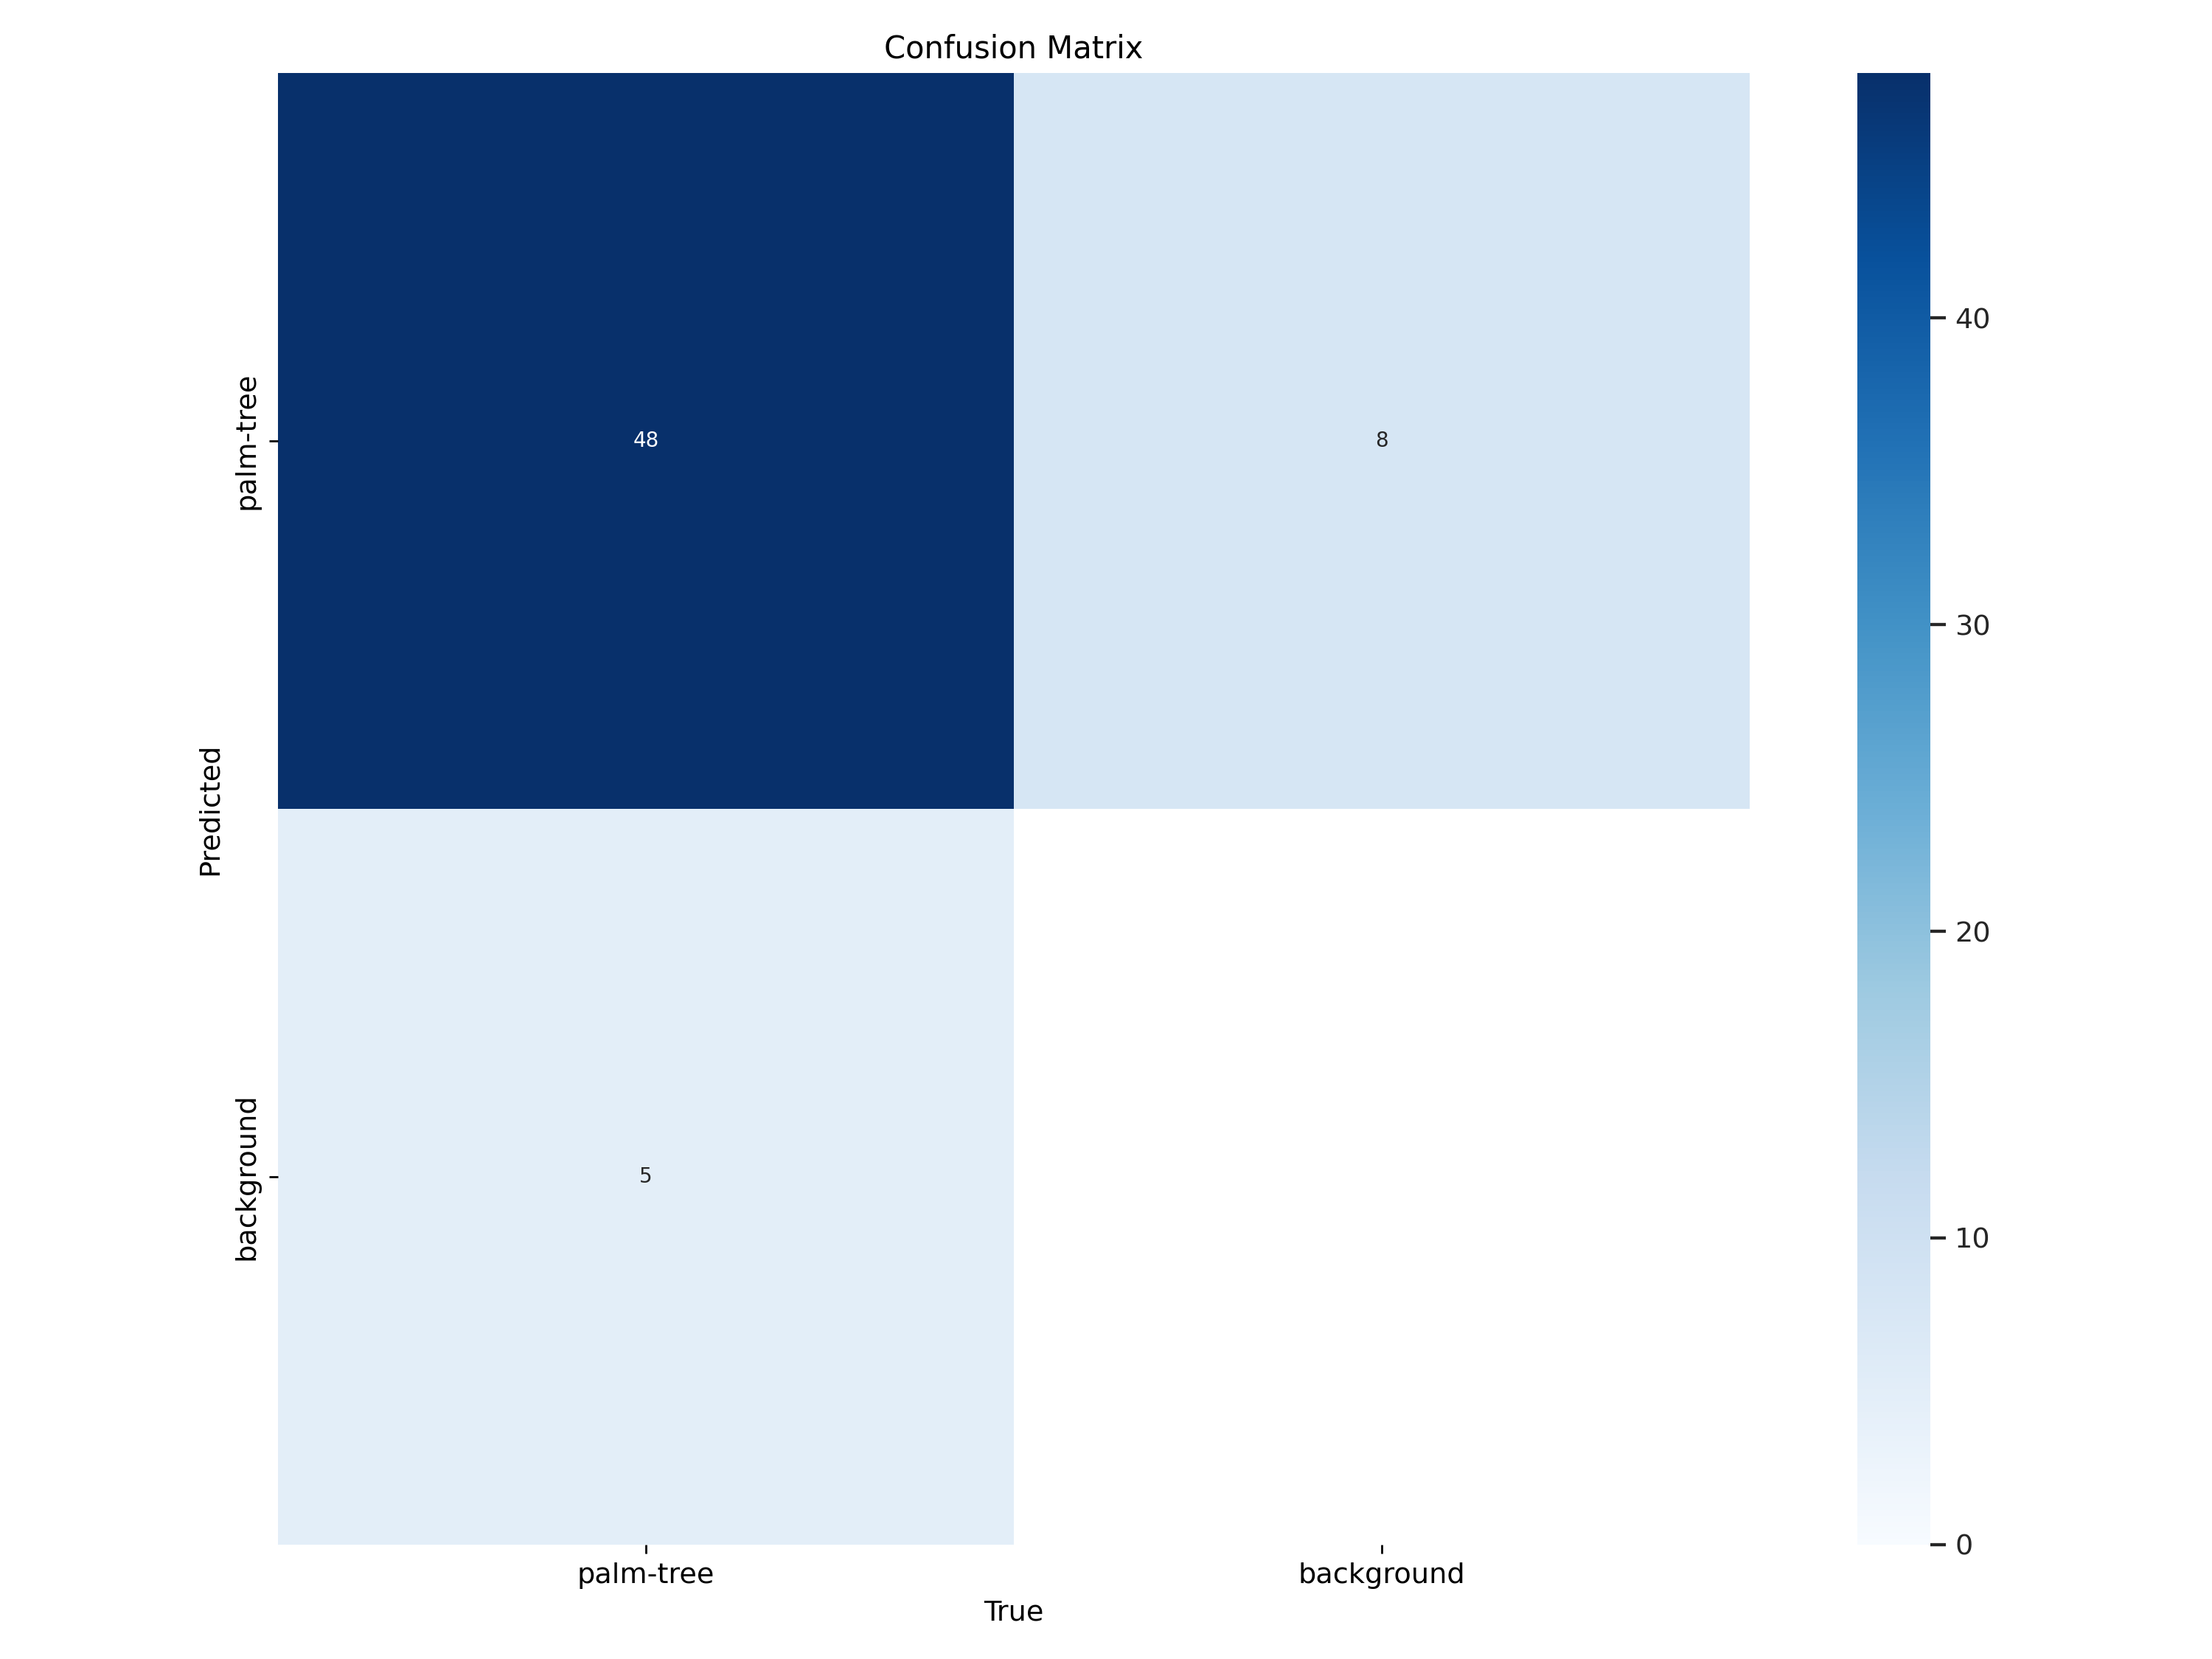

In [12]:
# Confussion Matrix
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/confusion_matrix.png', width=600)

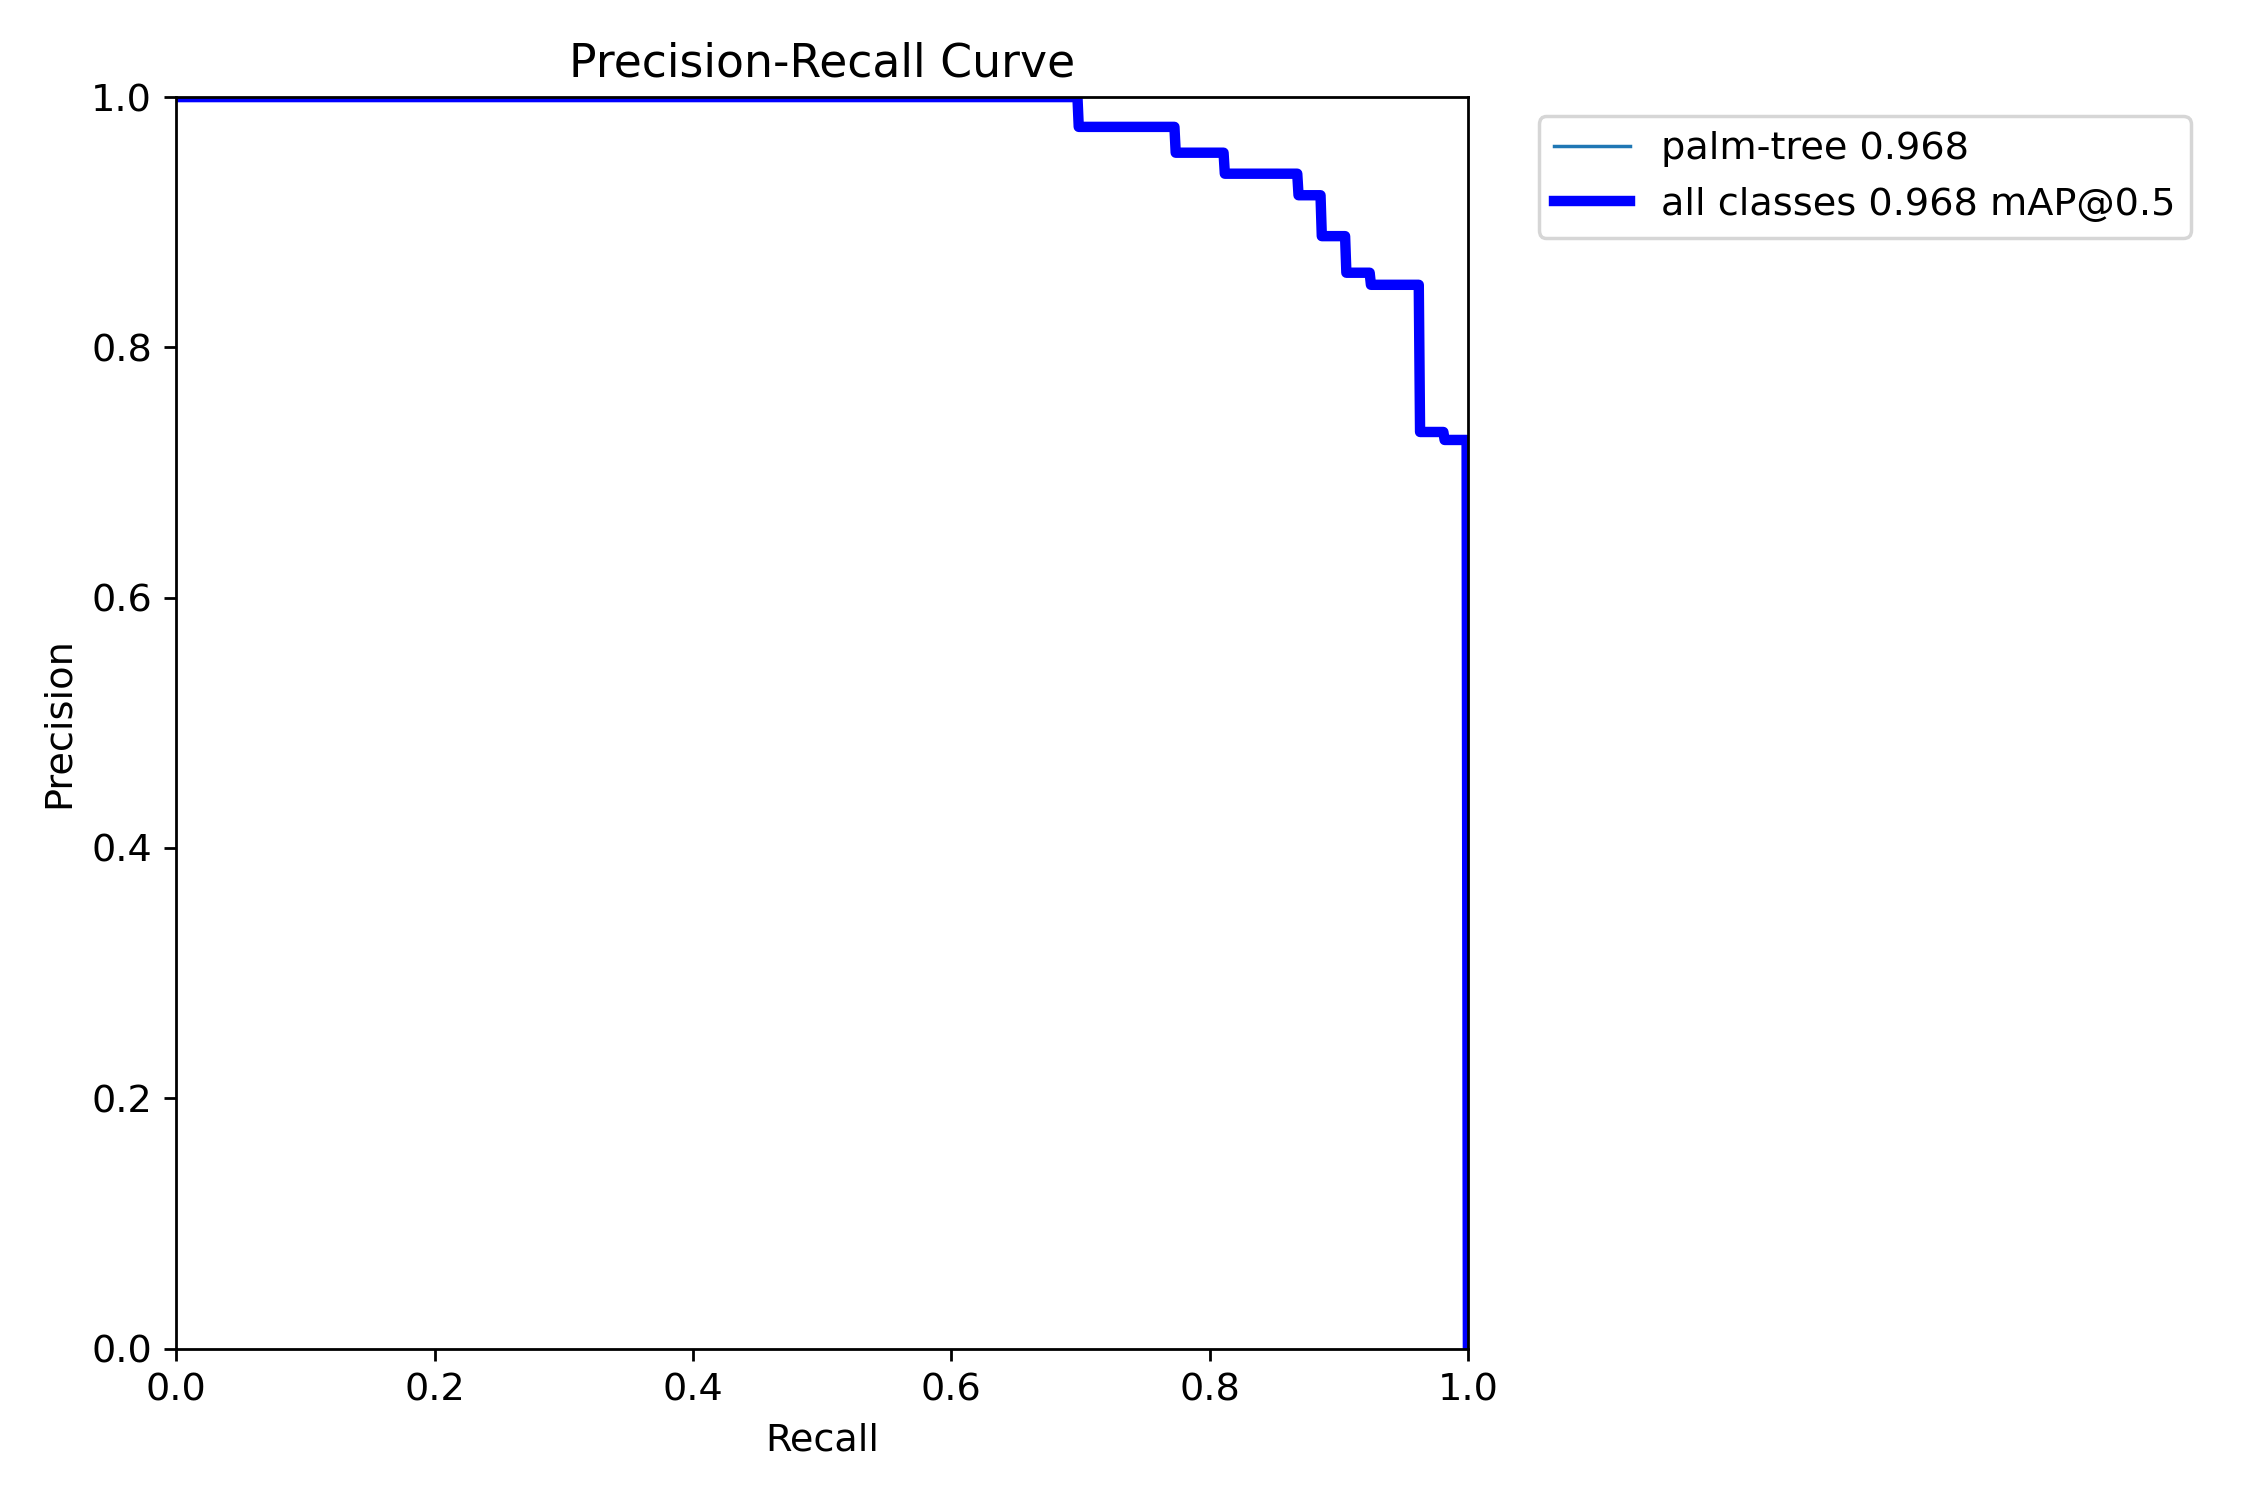

In [13]:
# Precision-Recall Curve Metrics Result
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/PR_curve.png', width=600)

In [4]:
# Benchmark on CPU
# dataset_path = "/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/data.yaml"
benchmark(model="/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/weights/best.pt", data=dataset_path, imgsz=640, half=False, device="cpu")

Setup complete ✅ (28 CPUs, 125.6 GB RAM, 20.3/110.0 GB disk)

Benchmarks complete for /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/weights/best.pt on /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/data.yaml at imgsz=640 (63.41s)
Benchmarks legend:  - ✅ Success  - ❎ Export passed but validation failed  - ❌️ Export failed
                   Format Status❔  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)    FPS
0                 PyTorch       ✅        5.2              0.6921                  55.73  17.94
1             TorchScript       ✅       10.4              0.6448                  57.24  17.47
2                    ONNX       ✅       10.1              0.6448                  44.69  22.38
3                OpenVINO       ✅       10.2              0.6448                  17.37  57.58
4                TensorRT       ❌        0.0                   -                      -      -
5                  CoreML 

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,5.2,0.6921,55.73,17.94
1,TorchScript,✅,10.4,0.6448,57.24,17.47
2,ONNX,✅,10.1,0.6448,44.69,22.38
3,OpenVINO,✅,10.2,0.6448,17.37,57.58
4,TensorRT,❌,0.0,NaN,NaN,NaN
5,CoreML,❎,5.1,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [3]:
# Aerial Image of Palm Tree Detection with Sliding Window Algorithm to ensure small tree pixel get detected

def detect_trees_with_tiling(image_path, model, tile_size=640, overlap=0.2, conf_threshold=0.3, iou_threshold=0.7):
    
    # Start timing for overall inference time
    start_time = time.time()
    
    # Loading aerial image
    print(f"Loading image: {image_path}")
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image of {image_path}")
        return None, 0
        
    h, w = image.shape[:2]
    print(f"Input Image Dimensions: {w}x{h}")
    
    result_image = image.copy()
    
    # Calculate window stride minus overlap percentage or allowance
    step = int(tile_size * (1 - overlap))
    
    all_detections = []
    tree_count = 0
    tiles_processed = 0
    
    # Process each tile one by one regading to defined size
    for y in range(0, h-tile_size+1, step):
        for x in range(0, w-tile_size+1, step):
            
            # Extract tile window
            tile = image[y:y+tile_size, x:x+tile_size]
            tiles_processed += 1
            
            # Run inference on current tile
            results = model(tile, conf=conf_threshold, iou=iou_threshold)
            
            # Provide prediction result on current tile
            if len(results[0].boxes) > 0:
                for box in results[0].boxes.xyxy:
                    
                    # Adjust coordinates from tile to original image
                    x1, y1, x2, y2 = map(int, box)
                    global_x1, global_y1 = x1 + x, y1 + y
                    global_x2, global_y2 = x2 + x, y2 + y
                    
                    # Check if this detection overlaps with previous ones
                    new_detection = True
                    for prev_box in all_detections:
                        if calculate_iou(prev_box, (global_x1, global_y1, global_x2, global_y2)) > 0.5:
                            new_detection = False
                            break
                    
                    if new_detection:
                        all_detections.append((global_x1, global_y1, global_x2, global_y2))

                        # count the trees quantity
                        tree_count += 1
                        
                        # Draw blue box and number
                        blue_color = (255, 0, 0)  # BGR: Blue
                        cv2.rectangle(result_image, (global_x1, global_y1), (global_x2, global_y2), blue_color, 2)
                        
                        # Add white background to text
                        text = str(tree_count)
                        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
                        cv2.rectangle(result_image, 
                                     (global_x1, global_y1-text_size[1]-10), 
                                     (global_x1+text_size[0], global_y1), 
                                     (255, 255, 255), 
                                     -1)
                        
                        # Draw text in black
                        cv2.putText(result_image, text, (global_x1, global_y1-10), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    # Calculate total inferencing time
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Found {tree_count} palm trees in {total_time:.2f} seconds.")
    
    # Save Image and Count result
    cv2.imwrite('counted_palms.jpg', result_image)
    return result_image, tree_count

def calculate_iou(box1, box2):
    
    # Calculate IOU to avoid duplicate detections
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    if x2 < x1 or y2 < y1:
        return 0.0
        
    intersection = (x2 - x1) * (y2 - y1)
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    return intersection / float(area1 + area2 - intersection)

In [6]:
# Start Prediction Using Base Model

# Loading The Trained Model
trained_model = YOLO("/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train/weights/best.pt")
trained_model.overrides['imgsz'] = 640 # overriding model input image for precision in cost of inference time
trained_model.overrides['verbose'] = False # hide the model inferencing logging
image_source = "/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/count-target.jpeg" # provided task image

# Run detection with sliding window
image, quantity = detect_trees_with_tiling(image_source, trained_model, tile_size=640, overlap=0.2, conf_threshold=0.3, iou_threshold=0.8)

Loading image: /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/count-target.jpeg
Input Image Dimensions: 5954x6978
Found 692 palm trees in 3.31 seconds.


In [4]:
# HYPERPARAMETER TUNING

# Training Model Hyperparameter tuning adjusted for uplifting the Recall (Coverage)
# imgsz: 640 # Keep using baseline image size as detection use sliding windows algorithm to sustain original image quality
# box: [0.05, 0.1, 0.5] # Trade-off Bounding Box Precision for more loose overlapping bounding box generation due to dense nature of the plantation layout
# iou: 0.8 # Allows more overlapping bounding box to be persist, showing more faded or incomplete tree
# cls: [0.2, 0.5, 0.8] # Adjust the priority of classifying less important , the non-complex pattern nature of the oil palm tree and single class case
# dfl: [0.5, 1.0, 1.5] # Adjust the quality of coordinate of bounding box 
# mixup: [0.0, 0.1, 0.2] # Allow more synhtesize augmenation for small dataset
# copy_paste: 0.3 # Mitigation for small datasets (by create new object arrangement that differ from neat layout of plantation)

# # Modified Inference parameter for higher recall (Coverage)
# conf: 0.2  # Trade-off the precision for more trees detection by allowing more overlapped detected tree to be persist
# iou: 0.8   # Adjusted overlapping tolerant to high due to narrow and dense oil palm plantation layout

search_space = {
    # Learning rate related
    'lr0': [0.01, 0.005, 0.001],  # initial learning rate
    'lrf': [0.01, 0.05, 0.1],     # final learning rate (as a fraction of lr0)
    
    # Optimizer related
    'momentum': [0.8, 0.9, 0.95],
    'weight_decay': [0.0005, 0.001, 0.005],
    
    # Augmentation
    'scale': [0.4, 0.5, 0.6],      # image scale (+/- gain)
    'mosaic': [0.5, 0.8, 1.0],     # mosaic probability
    'mixup': [0.0, 0.1, 0.2],      # mixup probability
    'copy_paste': [0.0, 0.1, 0.2],
    
    # Loss function weights
    'box': [0.05, 0.1, 0.5],      # box loss weight
    'cls': [0.2, 0.5, 0.8],        # class loss weight
    'dfl': [0.5, 1.0, 1.5],        # Distribution Focal Loss weight
    
    # Warmup settings
    'warmup_epochs': [1, 3, 5],
    'warmup_momentum': [0.5, 0.8, 0.95],
}

In [ ]:
tuned_model = YOLO("yolo11n.pt")
tuned_model.tune(data=dataset_path, space=search_space, epochs=50, iterations=5, optimizer="AdamW", plots=True, save=True, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune12'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.005, 'lrf': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'scale': 0.5, 'mosaic': 0.8, 'mixup': 0.0, 'copy_paste': 0.0, 'box': 0.1, 'cls': 0.5, 'dfl': 1.0, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8}
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False

E0000 00:00:1742201545.969955    8199 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742201545.975830    8199 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742201545.989930    8199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201545.989945    8199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201545.989947    8199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201545.989949    8199 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/train/labels.cache... 456 images, 27 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G    0.02268      1.957      1.255         47        640: 100%|██████████| 29/29 [00:05<00:00,  5.56it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.24G    0.02047       1.28      1.108         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G    0.02028      1.203      1.106         53        640: 100%|██████████| 29/29 [00:03<00:00,  8.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.28G    0.02036      1.161      1.113         31        640: 100%|██████████| 29/29 [00:03<00:00,  8.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.29G    0.01965      1.108      1.067         32        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.31G    0.01843      1.037      1.013         30        640: 100%|██████████| 29/29 [00:03<00:00,  9.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.32G    0.01866      1.031      1.035         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.34G    0.01822       1.03      1.013         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.35G    0.01781          1      1.014         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.19it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.37G    0.01713     0.9429     0.9765         36        640: 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.37G    0.01682     0.9216     0.9703         41        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.37G    0.01702     0.9276      0.976         28        640: 100%|██████████| 29/29 [00:03<00:00,  8.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G    0.01682     0.9044     0.9541         57        640: 100%|██████████| 29/29 [00:03<00:00,  8.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.37G    0.01672     0.8946     0.9553         52        640: 100%|██████████| 29/29 [00:03<00:00,  8.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.37G     0.0162     0.8746     0.9517         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.37G    0.01678     0.8793     0.9562         43        640: 100%|██████████| 29/29 [00:03<00:00,  8.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.37G    0.01627     0.8738     0.9458         53        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.37G    0.01636     0.8326     0.9492         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.37G    0.01599     0.8376     0.9406         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.81it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.37G    0.01598     0.8352     0.9283         34        640: 100%|██████████| 29/29 [00:03<00:00,  8.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.37G    0.01626     0.8627     0.9589         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.37G    0.01663      0.834     0.9539         43        640: 100%|██████████| 29/29 [00:03<00:00,  9.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.37G    0.01626     0.8157     0.9362         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.55it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.37G    0.01577     0.8222     0.9295         41        640: 100%|██████████| 29/29 [00:03<00:00,  8.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G    0.01565     0.8182     0.9256         23        640: 100%|██████████| 29/29 [00:03<00:00,  8.69it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G    0.01547     0.8153     0.9176         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.37G    0.01498     0.7786     0.9061         39        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.37G    0.01516     0.7945     0.9026         48        640: 100%|██████████| 29/29 [00:03<00:00,  8.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.37G    0.01541     0.7864     0.9122         51        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.37G    0.01513     0.7896     0.9112         25        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.37G    0.01473     0.7413     0.8913         48        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.37G    0.01502      0.744     0.8813         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G     0.0147     0.7499     0.8878         45        640: 100%|██████████| 29/29 [00:03<00:00,  9.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.37G    0.01467     0.7627     0.8898         33        640: 100%|██████████| 29/29 [00:03<00:00,  8.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.37G    0.01436     0.7401     0.8933         44        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.37G    0.01437     0.7266     0.9017         27        640: 100%|██████████| 29/29 [00:03<00:00,  8.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.37G    0.01437     0.7398     0.8848         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.37G    0.01412     0.7223     0.8867         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.37G    0.01411     0.7165     0.8806         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.37G    0.01437     0.7027     0.8837         28        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.37G    0.01366     0.6645     0.9173         16        640: 100%|██████████| 29/29 [00:03<00:00,  7.34it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G    0.01367     0.6202     0.9289         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.38G    0.01324     0.5793     0.9284         25        640: 100%|██████████| 29/29 [00:03<00:00,  8.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.38G    0.01312     0.5709     0.9025         19        640: 100%|██████████| 29/29 [00:03<00:00,  8.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.38G     0.0128     0.5593     0.9025         16        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G    0.01297     0.5673     0.9137         14        640: 100%|██████████| 29/29 [00:03<00:00,  8.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.38G    0.01276     0.5441     0.8945         17        640: 100%|██████████| 29/29 [00:03<00:00,  9.19it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G    0.01271     0.5354     0.8924         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G    0.01274     0.5405     0.8977         21        640: 100%|██████████| 29/29 [00:03<00:00,  9.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.38G    0.01244     0.5326     0.8805         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]


                   all         20         53      0.957      0.846      0.945      0.684

50 epochs completed in 0.053 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 5.5MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


                   all         20         53      0.957      0.845      0.945      0.685
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train9
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune12/tune_scatter_plots.png
Saved runs/detect/tune12/tune_fitness.png

Tuner: 1/5 iterations complete ✅ (213.59s)
Tuner: Results saved to runs/detect/tune12
Tuner: Best fitness=0.71041 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.95728, 'metrics/recall(B)': 0.8457, 'metrics/mAP50(B)': 0.94475, 'metrics/mAP50-95(B)': 0.68437, 'val/box_loss': 0.01428, 'val/cls_loss': 0.65155, 'val/dfl_loss': 0.94077, 'fitness': 0.71041}
Tuner: Best fitness model is runs/detect/train9
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune12/best_hyperparameters.yaml'

lr0: 0.005
lrf: 0.01
momentum: 0.9
weight_decay: 0.0005
scale: 0.5
mosaic: 0.8
mixup: 0.0
copy_

E0000 00:00:1742201759.449063    8386 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742201759.455002    8386 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742201759.469528    8386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201759.469545    8386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201759.469547    8386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201759.469565    8386 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/train/labels.cache... 456 images, 27 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G     0.0217      2.001      1.255         41        640: 100%|██████████| 29/29 [00:05<00:00,  5.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G    0.01952      1.276      1.106         30        640: 100%|██████████| 29/29 [00:03<00:00,  8.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.23G    0.01914      1.154      1.097         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.25G    0.01978      1.138      1.104         33        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G    0.01874      1.074      1.084         33        640: 100%|██████████| 29/29 [00:03<00:00,  9.41it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.28G    0.01779      1.014      1.023         34        640: 100%|██████████| 29/29 [00:02<00:00,  9.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.29G    0.01777      1.033      1.053         38        640: 100%|██████████| 29/29 [00:02<00:00,  9.75it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.3G    0.01744     0.9675      1.018         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.50it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.31G    0.01701     0.9404     0.9974         40        640: 100%|██████████| 29/29 [00:02<00:00,  9.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.33G    0.01661     0.9212     0.9827         31        640: 100%|██████████| 29/29 [00:02<00:00,  9.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G    0.01708      0.908     0.9892         52        640: 100%|██████████| 29/29 [00:02<00:00,  9.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.36G    0.01653     0.9134     0.9825         26        640: 100%|██████████| 29/29 [00:03<00:00,  8.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.36G    0.01617     0.8851     0.9805         37        640: 100%|██████████| 29/29 [00:02<00:00,  9.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.36G    0.01648       0.87     0.9733         29        640: 100%|██████████| 29/29 [00:02<00:00,  9.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.36G    0.01593     0.8623     0.9599         28        640: 100%|██████████| 29/29 [00:02<00:00,  9.71it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.36G    0.01551      0.839     0.9425         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.57it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.36G    0.01555     0.8552     0.9458         35        640: 100%|██████████| 29/29 [00:02<00:00,  9.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.36G    0.01536     0.8253     0.9422         50        640: 100%|██████████| 29/29 [00:03<00:00,  9.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G    0.01533     0.8174     0.9402         27        640: 100%|██████████| 29/29 [00:02<00:00,  9.72it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.36G    0.01531     0.8354     0.9419         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.58it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G    0.01504     0.7881     0.9171         31        640: 100%|██████████| 29/29 [00:02<00:00,  9.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.36G    0.01517     0.8058     0.9138         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.36G    0.01489     0.7971     0.9192         29        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.36G    0.01482     0.7832     0.9135         21        640: 100%|██████████| 29/29 [00:03<00:00,  8.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.36G     0.0148     0.7949     0.9302         33        640: 100%|██████████| 29/29 [00:03<00:00,  9.22it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.36G    0.01453     0.7785     0.9049         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.36G    0.01432     0.7621     0.9126         29        640: 100%|██████████| 29/29 [00:03<00:00,  8.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.36G    0.01449     0.7962     0.9089         41        640: 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.36G    0.01417     0.7635     0.8966         32        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.36G    0.01475     0.7679     0.9228         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G    0.01457     0.7423     0.9123         45        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.36G    0.01411     0.7448     0.9035         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.36G    0.01414     0.7257      0.898         47        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G    0.01396     0.7333     0.8852         47        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G     0.0138     0.7311     0.8907         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.36G     0.0135     0.6989     0.8881         41        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.36G    0.01379     0.6946     0.8879         36        640: 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.36G    0.01383     0.6993     0.8825         39        640: 100%|██████████| 29/29 [00:03<00:00,  9.13it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.36G    0.01348     0.7102     0.8751         34        640: 100%|██████████| 29/29 [00:03<00:00,  9.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.36G    0.01382     0.7166     0.8912         35        640: 100%|██████████| 29/29 [00:03<00:00,  9.00it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.36G     0.0131     0.6513     0.9157         16        640: 100%|██████████| 29/29 [00:03<00:00,  7.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.36G    0.01276     0.6013       0.92         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.36G    0.01246     0.5648     0.9162         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.36it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G    0.01244     0.5586     0.8925         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G    0.01226      0.556     0.9025         16        640: 100%|██████████| 29/29 [00:03<00:00,  9.19it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G    0.01201     0.5555     0.8961         14        640: 100%|██████████| 29/29 [00:03<00:00,  9.24it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G    0.01198     0.5361     0.8805         17        640: 100%|██████████| 29/29 [00:03<00:00,  9.25it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.36G    0.01196     0.5322     0.8846         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.36G    0.01186     0.5271     0.8889         21        640: 100%|██████████| 29/29 [00:03<00:00,  9.28it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.36G    0.01157     0.5135     0.8678         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


                   all         20         53       0.94      0.881      0.958      0.692

50 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 5.5MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]


                   all         20         53       0.94       0.88      0.958      0.694
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train10
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune12/tune_scatter_plots.png
Saved runs/detect/tune12/tune_fitness.png

Tuner: 2/5 iterations complete ✅ (420.51s)
Tuner: Results saved to runs/detect/tune12
Tuner: Best fitness=0.71879 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.93961, 'metrics/recall(B)': 0.88079, 'metrics/mAP50(B)': 0.95819, 'metrics/mAP50-95(B)': 0.69219, 'val/box_loss': 0.01388, 'val/cls_loss': 0.65067, 'val/dfl_loss': 0.9549, 'fitness': 0.71879}
Tuner: Best fitness model is runs/detect/train10
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune12/best_hyperparameters.yaml'

lr0: 0.005
lrf: 0.01
momentum: 0.9
weight_decay: 0.0005
scale: 0.46883
mosaic: 0.72701
mixup:

E0000 00:00:1742201966.391300    8563 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742201966.397332    8563 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742201966.411467    8563 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201966.411482    8563 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201966.411484    8563 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742201966.411486    8563 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/train/labels.cache... 456 images, 27 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G    0.02233      1.976       1.22         46        640: 100%|██████████| 29/29 [00:05<00:00,  5.65it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.27G    0.02049      1.281      1.092         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.68it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.29G    0.01965      1.215      1.071         52        640: 100%|██████████| 29/29 [00:03<00:00,  8.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G    0.01957      1.128       1.07         31        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G    0.01903      1.089      1.039         49        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G    0.01796      1.021      1.001         32        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.35G    0.01764      1.007     0.9857         38        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G    0.01761     0.9815     0.9868         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G    0.01688     0.9058      0.952         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.86it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.4G     0.0169     0.9189     0.9561         37        640: 100%|██████████| 29/29 [00:03<00:00,  9.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.41G     0.0169      0.897     0.9564         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.41G     0.0166     0.9102     0.9369         28        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.41G    0.01623     0.8758     0.9276         35        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.41G    0.01634     0.8668     0.9246         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G    0.01616     0.8617     0.9372         41        640: 100%|██████████| 29/29 [00:03<00:00,  8.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.41G    0.01597     0.8352     0.9235         39        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G    0.01617     0.8379     0.9201         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.41G    0.01595     0.8091     0.9176         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.41G    0.01551     0.8298     0.9178         36        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.41G    0.01566     0.8269     0.9027         34        640: 100%|██████████| 29/29 [00:03<00:00,  8.80it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G    0.01526     0.8173     0.8973         29        640: 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.41G    0.01553     0.8071      0.904         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.42G    0.01564     0.7873     0.9085         39        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.42G    0.01522      0.799     0.8882         31        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.42G    0.01491     0.7584     0.8818         30        640: 100%|██████████| 29/29 [00:03<00:00,  8.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.42G    0.01511     0.7838     0.8863         38        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.42G    0.01485     0.7528      0.885         29        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.42G    0.01516      0.777     0.8837         44        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.42G    0.01441      0.738     0.8764         35        640: 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.42G    0.01459     0.7543     0.8602         33        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.42G    0.01429     0.7573     0.8659         27        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.42G    0.01431     0.7411      0.852         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.42G    0.01429     0.7411     0.8679         40        640: 100%|██████████| 29/29 [00:03<00:00,  8.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.42G    0.01421     0.7188     0.8626         47        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.42G    0.01438     0.7326     0.8699         39        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.42G    0.01407     0.7184     0.8507         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.42G    0.01389     0.7184     0.8507         49        640: 100%|██████████| 29/29 [00:03<00:00,  9.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.42G    0.01399     0.7168     0.8626         28        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.42G    0.01392     0.6893     0.8519         42        640: 100%|██████████| 29/29 [00:03<00:00,  8.87it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.42G    0.01375      0.689     0.8407         55        640: 100%|██████████| 29/29 [00:03<00:00,  8.70it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.42G     0.0134     0.6537     0.8883         16        640: 100%|██████████| 29/29 [00:03<00:00,  7.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.42G    0.01292     0.5989     0.8883         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.42G    0.01268      0.563     0.8867         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.42G    0.01273     0.5589     0.8639         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.42G    0.01245     0.5465     0.8689         16        640: 100%|██████████| 29/29 [00:02<00:00,  9.74it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.42G    0.01253     0.5517     0.8777         14        640: 100%|██████████| 29/29 [00:03<00:00,  8.77it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.42G    0.01223     0.5287     0.8534         17        640: 100%|██████████| 29/29 [00:02<00:00,  9.78it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.42G    0.01232     0.5207     0.8589         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.66it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.42G    0.01218     0.5266     0.8625         21        640: 100%|██████████| 29/29 [00:02<00:00,  9.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.42G    0.01202     0.5144     0.8461         24        640: 100%|██████████| 29/29 [00:02<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]


                   all         20         53      0.902      0.925      0.958      0.686

50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 5.5MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.71it/s]


                   all         20         53      0.901      0.925      0.958      0.689
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train11
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune12/tune_scatter_plots.png
Saved runs/detect/tune12/tune_fitness.png

Tuner: 3/5 iterations complete ✅ (631.14s)
Tuner: Results saved to runs/detect/tune12
Tuner: Best fitness=0.71879 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.93961, 'metrics/recall(B)': 0.88079, 'metrics/mAP50(B)': 0.95819, 'metrics/mAP50-95(B)': 0.69219, 'val/box_loss': 0.01388, 'val/cls_loss': 0.65067, 'val/dfl_loss': 0.9549, 'fitness': 0.71879}
Tuner: Best fitness model is runs/detect/train10
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune12/best_hyperparameters.yaml'

lr0: 0.005
lrf: 0.01
momentum: 0.9
weight_decay: 0.0005
scale: 0.46883
mosaic: 0.72701
mixup:

E0000 00:00:1742202177.034182    8744 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742202177.040020    8744 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742202177.054650    8744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202177.054668    8744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202177.054670    8744 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202177.054687    8744 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/train/labels.cache... 456 images, 27 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train12/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G    0.02151      1.939      1.201         46        640: 100%|██████████| 29/29 [00:05<00:00,  5.70it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.27G    0.01919       1.25      1.056         39        640: 100%|██████████| 29/29 [00:03<00:00,  8.73it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.29G    0.01973      1.214      1.077         51        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G    0.01995       1.14      1.076         31        640: 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G    0.01815      1.055      1.004         32        640: 100%|██████████| 29/29 [00:03<00:00,  9.18it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G    0.01735     0.9926     0.9787         29        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.35G    0.01721      1.008     0.9812         39        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G    0.01709     0.9971      0.964         34        640: 100%|██████████| 29/29 [00:03<00:00,  8.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G    0.01653      0.953     0.9578         38        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.4G    0.01667      0.927     0.9502         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.41G    0.01655     0.9141     0.9527         43        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.41G    0.01644     0.9212     0.9401         26        640: 100%|██████████| 29/29 [00:03<00:00,  8.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.41G    0.01574     0.8887     0.9122         53        640: 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.41G    0.01573     0.8849     0.9148         51        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G     0.0155     0.8581     0.9189         35        640: 100%|██████████| 29/29 [00:03<00:00,  9.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.41G    0.01574     0.8443     0.9161         40        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G    0.01565     0.8577     0.9177         50        640: 100%|██████████| 29/29 [00:03<00:00,  8.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.41G    0.01559     0.8233      0.915         35        640: 100%|██████████| 29/29 [00:03<00:00,  8.44it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.41G    0.01502     0.8262     0.9019         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.61it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.41G    0.01537     0.8232     0.8973         34        640: 100%|██████████| 29/29 [00:03<00:00,  8.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G    0.01539     0.8463     0.9144         19        640: 100%|██████████| 29/29 [00:03<00:00,  8.67it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.41G    0.01531     0.8123     0.9074         42        640: 100%|██████████| 29/29 [00:03<00:00,  8.89it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.41G    0.01526     0.8038     0.8983         37        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.41G    0.01491     0.8064     0.8994         40        640: 100%|██████████| 29/29 [00:03<00:00,  8.93it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.41G     0.0151     0.8094     0.8983         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.41G    0.01468     0.7929     0.8775         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.76it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.41G     0.0143     0.7598     0.8694         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.85it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.41G    0.01448     0.7721     0.8686         48        640: 100%|██████████| 29/29 [00:03<00:00,  8.88it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.41G    0.01427     0.7556     0.8659         50        640: 100%|██████████| 29/29 [00:03<00:00,  8.91it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G    0.01434     0.7786     0.8728         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.06it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G    0.01382     0.7147     0.8483         46        640: 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.41G    0.01432      0.736     0.8553         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.41G    0.01399     0.7335     0.8551         45        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.41G    0.01381     0.7302     0.8575         33        640: 100%|██████████| 29/29 [00:03<00:00,  8.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.41G    0.01357     0.7154     0.8597         42        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.41G    0.01371     0.7134     0.8654         26        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G     0.0138     0.7271     0.8559         39        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.41G    0.01351      0.713     0.8535         25        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G    0.01349       0.71     0.8463         27        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.41G    0.01354     0.6981     0.8458         28        640: 100%|██████████| 29/29 [00:03<00:00,  8.88it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.41G    0.01299     0.6572     0.8788         16        640: 100%|██████████| 29/29 [00:03<00:00,  7.37it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.41G    0.01286        0.6     0.8857         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.27it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.41G    0.01254     0.5684     0.8839         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.41G    0.01232     0.5622     0.8585         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.41G    0.01207     0.5368     0.8604         16        640: 100%|██████████| 29/29 [00:03<00:00,  9.21it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.41G    0.01205     0.5446      0.866         14        640: 100%|██████████| 29/29 [00:03<00:00,  9.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.41G    0.01187     0.5221     0.8457         17        640: 100%|██████████| 29/29 [00:03<00:00,  9.20it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.41G    0.01183     0.5216     0.8491         24        640: 100%|██████████| 29/29 [00:03<00:00,  8.98it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.41G    0.01189     0.5172     0.8565         21        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.41G    0.01169     0.5138     0.8423         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


                   all         20         53      0.892      0.906      0.947      0.663

50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train12/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train12/weights/best.pt, 5.5MB

Validating runs/detect/train12/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]


                   all         20         53      0.894      0.906      0.947      0.664
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train12
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune12/tune_scatter_plots.png
Saved runs/detect/tune12/tune_fitness.png

Tuner: 4/5 iterations complete ✅ (842.72s)
Tuner: Results saved to runs/detect/tune12
Tuner: Best fitness=0.71879 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.93961, 'metrics/recall(B)': 0.88079, 'metrics/mAP50(B)': 0.95819, 'metrics/mAP50-95(B)': 0.69219, 'val/box_loss': 0.01388, 'val/cls_loss': 0.65067, 'val/dfl_loss': 0.9549, 'fitness': 0.71879}
Tuner: Best fitness model is runs/detect/train10
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune12/best_hyperparameters.yaml'

lr0: 0.005
lrf: 0.01
momentum: 0.9
weight_decay: 0.0005
scale: 0.46883
mosaic: 0.72701
mixup:

E0000 00:00:1742202388.594646    8917 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742202388.600748    8917 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742202388.615110    8917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202388.615126    8917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202388.615128    8917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742202388.615130    8917 computation_placer.cc:177] computation placer already registered. Please check linka

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/train/labels.cache... 456 images, 27 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train13
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G    0.02288      1.922      1.217         47        640: 100%|██████████| 29/29 [00:05<00:00,  5.49it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.27G    0.02068      1.212      1.068         38        640: 100%|██████████| 29/29 [00:03<00:00,  8.60it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G    0.02019      1.135      1.053         53        640: 100%|██████████| 29/29 [00:03<00:00,  8.31it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.31G    0.01995      1.095      1.049         31        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G    0.01891      1.029      1.004         32        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.34G    0.01894     0.9934      0.987         30        640: 100%|██████████| 29/29 [00:03<00:00,  9.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.36G    0.01796     0.9767     0.9717         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.15it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G      0.018     0.9641     0.9636         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G    0.01749     0.9227     0.9587         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.04it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.4G    0.01776     0.9029       0.95         36        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.41G    0.01692      0.882      0.937         41        640: 100%|██████████| 29/29 [00:03<00:00,  8.23it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.41G    0.01742      0.889     0.9484         28        640: 100%|██████████| 29/29 [00:03<00:00,  8.96it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.41G     0.0168     0.8736     0.9175         57        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.41G    0.01656     0.8608     0.9167         52        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.41G    0.01613     0.8288     0.9153         36        640: 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.41G    0.01649     0.8214     0.9078         43        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G    0.01643     0.8314     0.9118         53        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.41G    0.01616     0.8035     0.9058         37        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.41G    0.01606     0.8128     0.9071         37        640: 100%|██████████| 29/29 [00:03<00:00,  9.11it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.41G    0.01618     0.8223     0.8993         34        640: 100%|██████████| 29/29 [00:03<00:00,  9.02it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.41G    0.01582     0.8285     0.9049         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.41G    0.01609     0.7994      0.902         43        640: 100%|██████████| 29/29 [00:03<00:00,  8.39it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.41G    0.01584     0.7769     0.8948         38        640: 100%|██████████| 29/29 [00:03<00:00,  9.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.41G    0.01548      0.789     0.8937         41        640: 100%|██████████| 29/29 [00:03<00:00,  8.99it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.41G    0.01552      0.786     0.8857         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.16it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.41G     0.0153     0.7788     0.8806         37        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.41G    0.01501     0.7486     0.8694         39        640: 100%|██████████| 29/29 [00:03<00:00,  8.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.41G    0.01498      0.764     0.8645         48        640: 100%|██████████| 29/29 [00:03<00:00,  8.92it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.41G    0.01521     0.7471     0.8704         51        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G    0.01508     0.7514     0.8739         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G    0.01459     0.7114     0.8507         48        640: 100%|██████████| 29/29 [00:03<00:00,  9.12it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.41G    0.01498     0.7216     0.8442         38        640: 100%|██████████| 29/29 [00:03<00:00,  9.00it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.41G    0.01493     0.7278     0.8579         45        640: 100%|██████████| 29/29 [00:03<00:00,  8.82it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.41G    0.01481      0.733     0.8572         33        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.41G    0.01437     0.7093     0.8589         44        640: 100%|██████████| 29/29 [00:03<00:00,  9.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.41G    0.01434     0.7019     0.8647         27        640: 100%|██████████| 29/29 [00:03<00:00,  9.01it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G    0.01435     0.7085     0.8488         40        640: 100%|██████████| 29/29 [00:03<00:00,  9.09it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.41G    0.01402     0.6934     0.8495         24        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.41G    0.01407     0.7012     0.8465         26        640: 100%|██████████| 29/29 [00:03<00:00,  9.14it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.41G    0.01426     0.6852     0.8448         28        640: 100%|██████████| 29/29 [00:03<00:00,  9.05it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.41G    0.01371     0.6397       0.88         16        640: 100%|██████████| 29/29 [00:03<00:00,  7.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.41G    0.01333     0.5903     0.8823         23        640: 100%|██████████| 29/29 [00:03<00:00,  9.08it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.41G    0.01324     0.5547     0.8886         25        640: 100%|██████████| 29/29 [00:03<00:00,  9.17it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.41G     0.0131     0.5479     0.8628         19        640: 100%|██████████| 29/29 [00:03<00:00,  9.03it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.41G     0.0127     0.5396     0.8661         16        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.41G    0.01269     0.5377     0.8716         14        640: 100%|██████████| 29/29 [00:03<00:00,  9.07it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.41G    0.01247     0.5147     0.8529         17        640: 100%|██████████| 29/29 [00:03<00:00,  8.94it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.41G    0.01263     0.5172     0.8552         24        640: 100%|██████████| 29/29 [00:03<00:00,  8.90it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.41G    0.01261     0.5194     0.8609         21        640: 100%|██████████| 29/29 [00:03<00:00,  8.95it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.41G    0.01236     0.5123     0.8444         24        640: 100%|██████████| 29/29 [00:03<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]


                   all         20         53      0.889      0.903      0.942      0.672

50 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 5.5MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


                   all         20         53      0.889      0.903      0.942      0.672
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train13
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune12/tune_scatter_plots.png
Saved runs/detect/tune12/tune_fitness.png

Tuner: 5/5 iterations complete ✅ (1053.99s)
Tuner: Results saved to runs/detect/tune12
Tuner: Best fitness=0.71879 observed at iteration 2
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.93961, 'metrics/recall(B)': 0.88079, 'metrics/mAP50(B)': 0.95819, 'metrics/mAP50-95(B)': 0.69219, 'val/box_loss': 0.01388, 'val/cls_loss': 0.65067, 'val/dfl_loss': 0.9549, 'fitness': 0.71879}
Tuner: Best fitness model is runs/detect/train10
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune12/best_hyperparameters.yaml'

lr0: 0.005
lrf: 0.01
momentum: 0.9
weight_decay: 0.0005
scale: 0.46883
mosaic: 0.72701
mixup

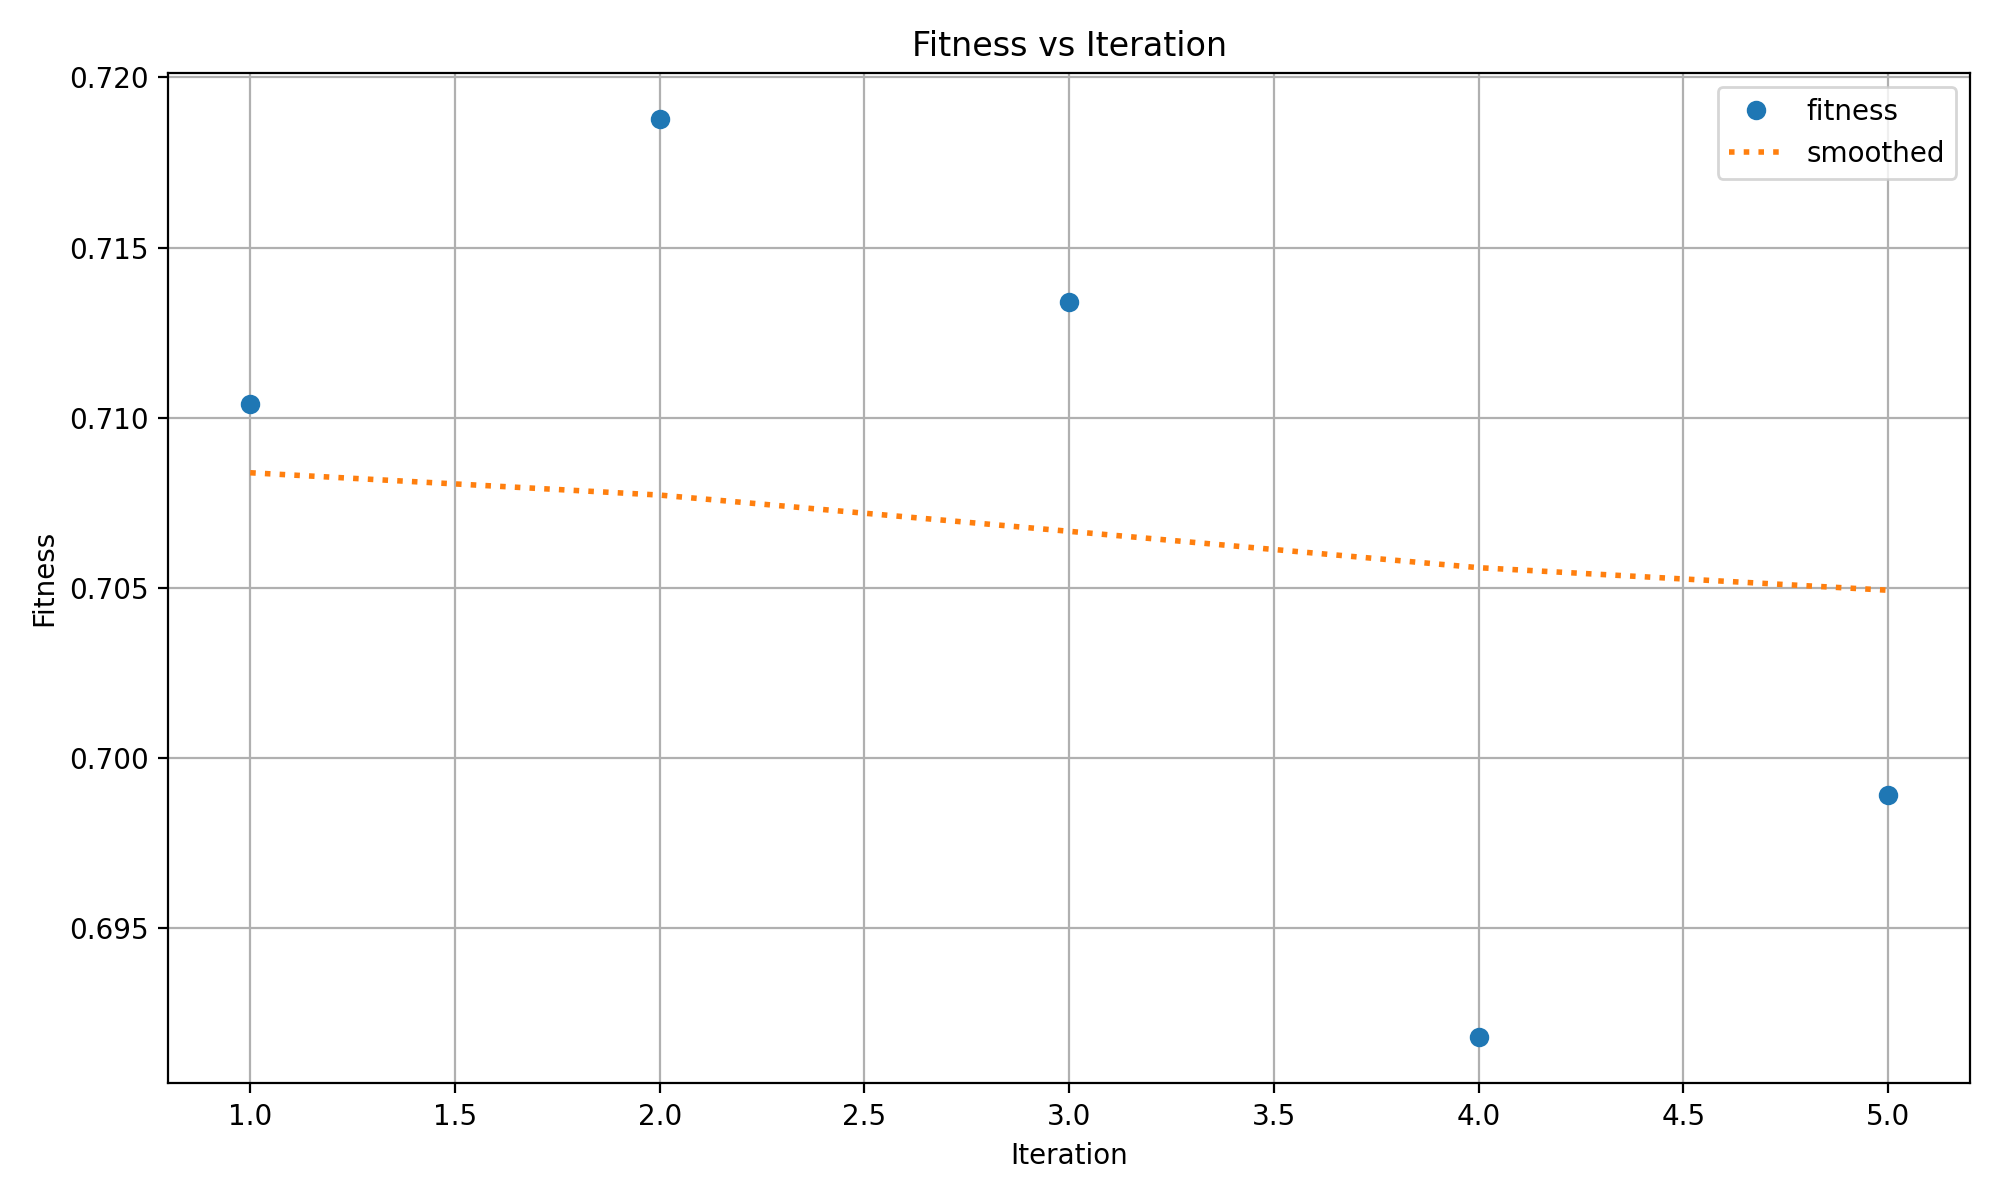

In [7]:
# Result Hyperparameter Search
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/tune12/tune_fitness.png', width=600)

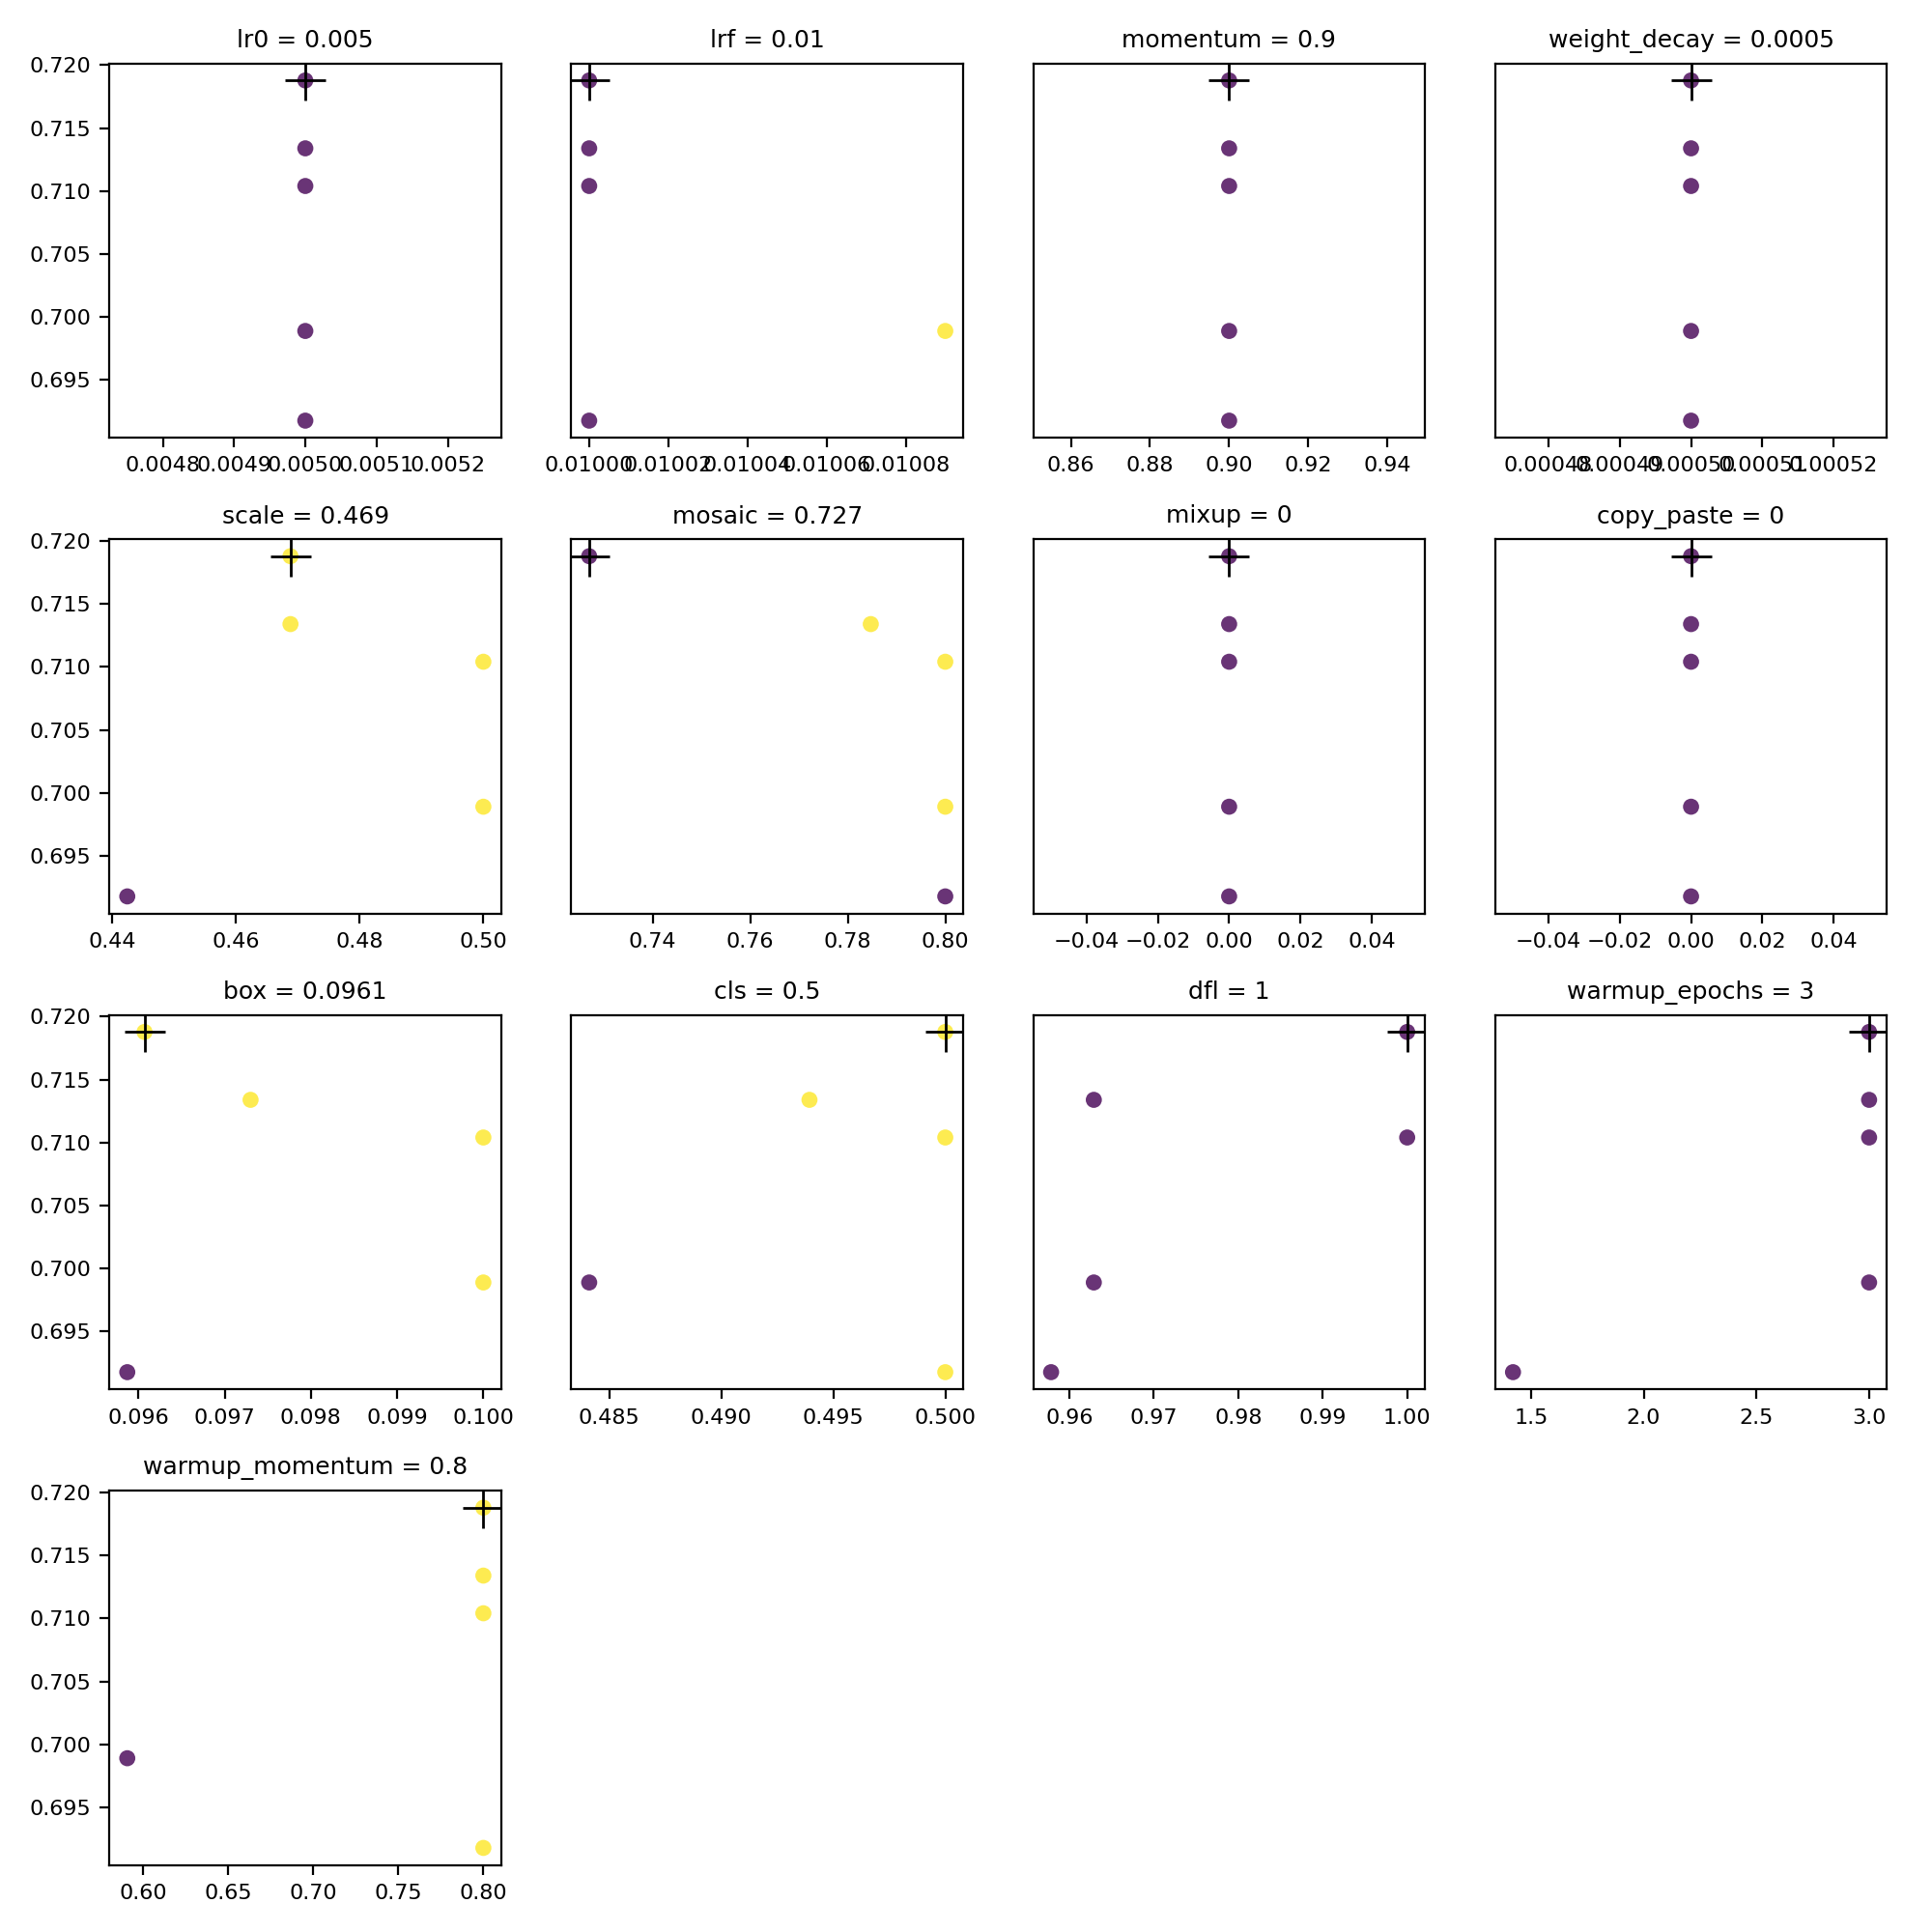

In [8]:
# Result Hyperparameter Search
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/tune12/tune_scatter_plots.png', width=600)

In [ ]:
# RE-TRAINING WITH ADJUSTED HYPERPARAMETER

custom_model = YOLO("yolo11n.pt")  # or your preferred model size
config_file = "/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/tune12/best_hyperparameters.yaml"

# Train with config file in a single line
custom_model_results = custom_model.train(cfg=config_file, data=dataset_path, epochs=150, imgsz=640, plots=True, save=True)

NameError: name 'YOLO' is not defined

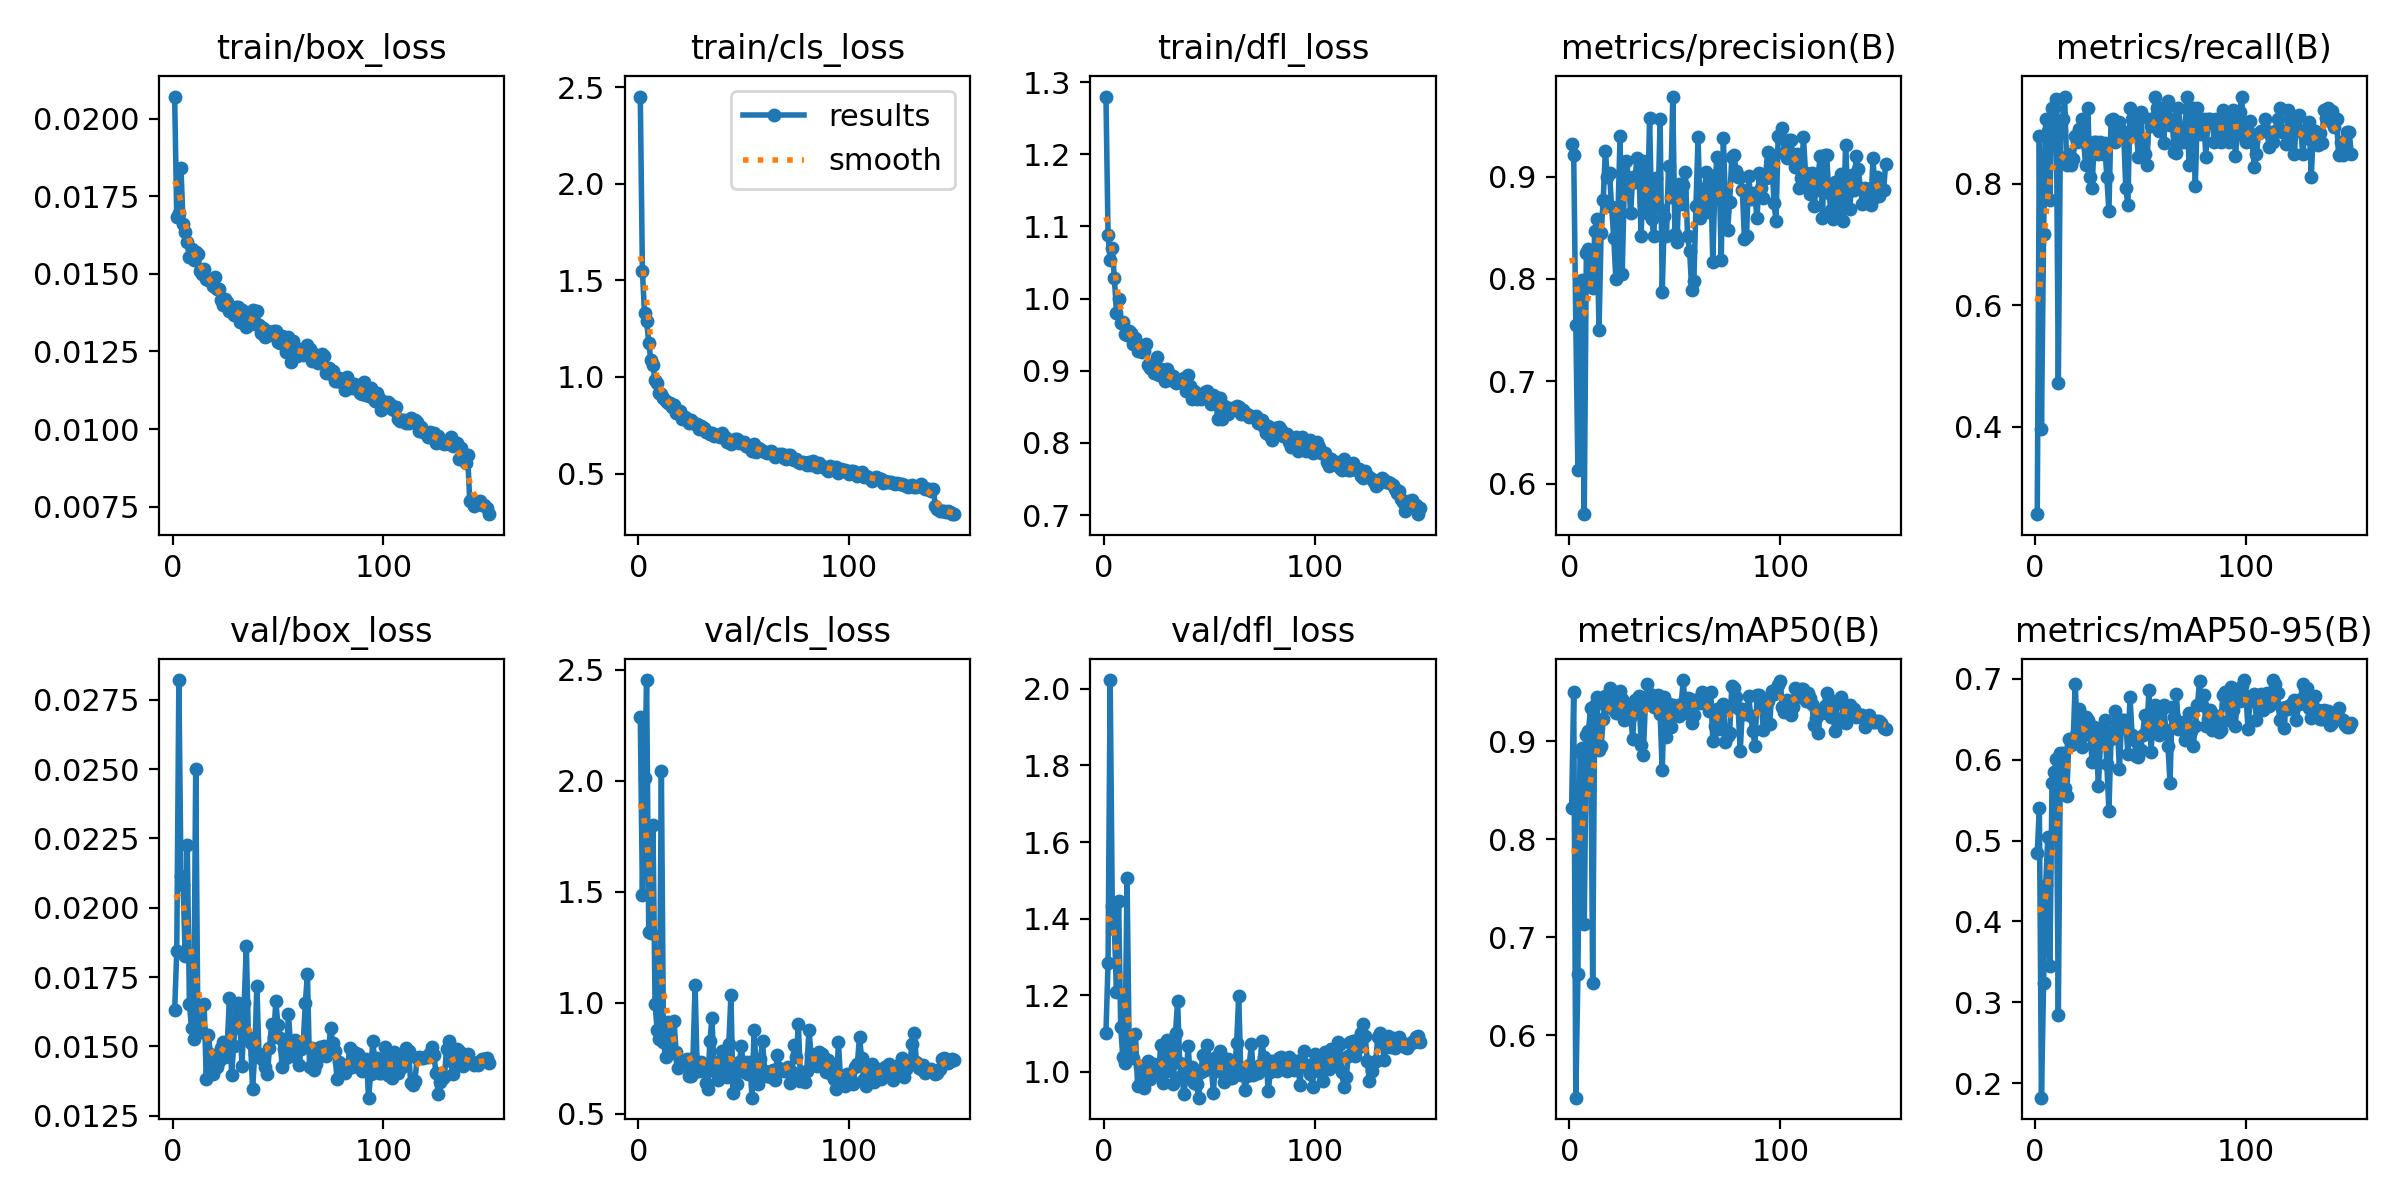

In [11]:
# Overall Training Metrics Result 
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train14/results.png', width=600)

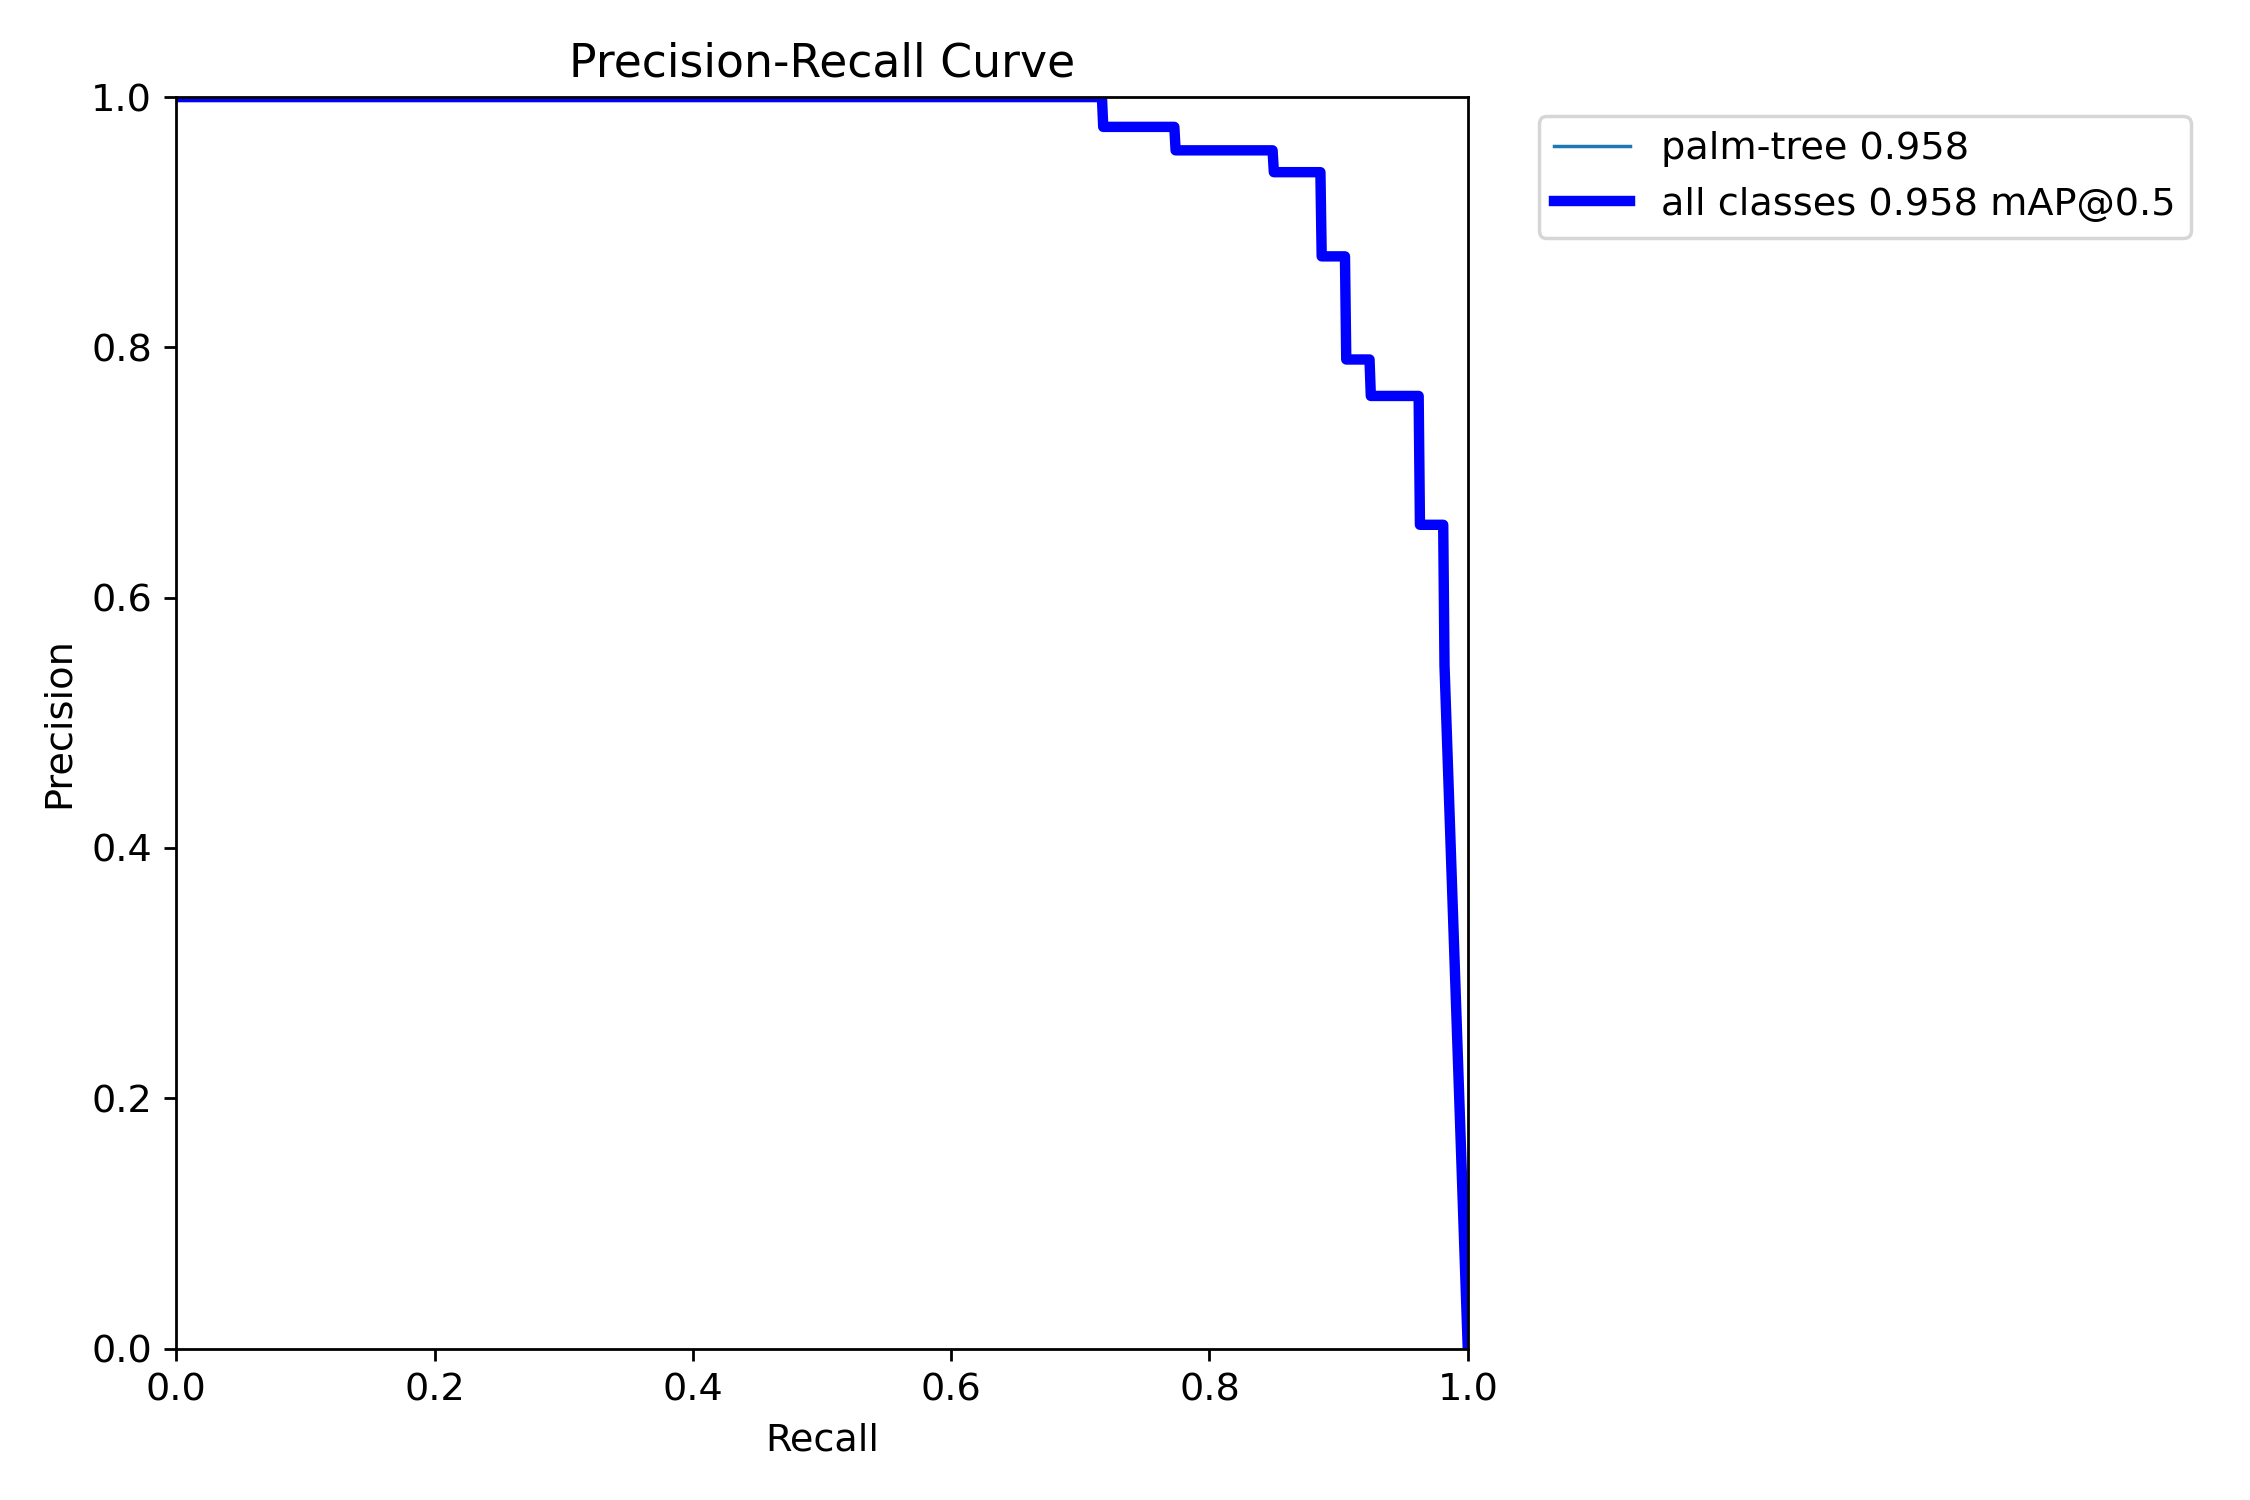

In [12]:
# Precision-Recall Curve Metrics Result
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train14/PR_curve.png', width=600)

In [4]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def validate_model_with_thresholds(model_path, data_yaml, thresholds=None):
    """
    Validate YOLOv11 model with different confidence thresholds and compare results.
    
    Args:
        model_path: Path to the trained model weights
        data_yaml: Path to the data YAML file
        thresholds: List of confidence thresholds to test
    """
    # Load the model
    model = YOLO(model_path)
    
    # Default thresholds
    if thresholds is None:
        thresholds = np.arange(0.1, 0.8, 0.1)
    
    # Store results
    results = []
    
    for conf in thresholds:
        print(f"\nValidating with confidence threshold = {conf}")
        
        # Run validation with specific confidence threshold
        metrics = model.val(data=data_yaml, conf=conf, verbose=True)
        
        # Extract key metrics
        precision = float(metrics.box.p)  # Convert to float
        recall = float(metrics.box.r)     # Convert to float
        
        # Calculate F1 score 
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-16)
        
        result = {
            'conf_threshold': float(conf),  # Convert to float
            'precision': precision,
            'recall': recall,
            'mAP50': float(metrics.box.map50),
            'mAP50-95': float(metrics.box.map),
            'f1': f1_score
        }
        
        results.append(result)
        print(f"Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1: {result['f1']:.4f}")
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    # Find threshold with maximum F1 score
    best_f1_idx = results_df['f1'].idxmax()
    best_threshold = results_df.loc[best_f1_idx, 'conf_threshold']
    
    print(f"\nBest confidence threshold based on F1 score: {best_threshold:.2f}")
    print(f"At this threshold - Precision: {results_df.loc[best_f1_idx, 'precision']:.4f}, " 
          f"Recall: {results_df.loc[best_f1_idx, 'recall']:.4f}, "
          f"F1: {results_df.loc[best_f1_idx, 'f1']:.4f}")
    
    # Plot results
    plot_results(results_df)
    
    return results_df

def plot_results(results_df):
    """Plot precision, recall, and F1 against confidence thresholds."""
    plt.figure(figsize=(12, 8))
    
    # Plot metrics vs threshold
    plt.subplot(1, 2, 1)
    plt.plot(results_df['conf_threshold'], results_df['precision'], 'b-', label='Precision')
    plt.plot(results_df['conf_threshold'], results_df['recall'], 'r-', label='Recall')
    plt.plot(results_df['conf_threshold'], results_df['f1'], 'g-', label='F1 Score')
    plt.xlabel('Confidence Threshold')
    plt.ylabel('Score')
    plt.title('Metrics vs Confidence Threshold')
    plt.grid(True)
    plt.legend()
    
    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(results_df['recall'], results_df['precision'], 'bo-')
    
    # Add threshold annotations
    for i, row in results_df.iterrows():
        plt.annotate(f"{row['conf_threshold']:.2f}", (row['recall'], row['precision']), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

In [5]:
# Tuning Confidence Threshold
model_path = '/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train14/weights/best.pt'
data_yaml = dataset_path
validate_model_with_thresholds(model_path, data_yaml)


Validating with confidence threshold = 0.1
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         20         53      0.939      0.878      0.931      0.689
Speed: 3.9ms preprocess, 19.8ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/val22
Precision: 0.9394, Recall: 0.8777, F1: 0.9075

Validating with confidence threshold = 0.2
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


                   all         20         53      0.939      0.868      0.924      0.685
Speed: 3.4ms preprocess, 4.2ms inference, 0.1ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val23
Precision: 0.9388, Recall: 0.8679, F1: 0.9020

Validating with confidence threshold = 0.30000000000000004
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


                   all         20         53      0.953      0.849      0.915       0.68
Speed: 3.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val24
Precision: 0.9533, Recall: 0.8491, F1: 0.8982

Validating with confidence threshold = 0.4
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         20         53      0.953      0.849      0.915       0.68
Speed: 3.6ms preprocess, 3.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val25
Precision: 0.9533, Recall: 0.8491, F1: 0.8982

Validating with confidence threshold = 0.5
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


                   all         20         53      0.957      0.849      0.917      0.682
Speed: 3.4ms preprocess, 2.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val26
Precision: 0.9574, Recall: 0.8491, F1: 0.9000

Validating with confidence threshold = 0.6
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


                   all         20         53      0.976      0.774      0.883      0.658
Speed: 3.8ms preprocess, 14.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val27
Precision: 0.9762, Recall: 0.7736, F1: 0.8632

Validating with confidence threshold = 0.7000000000000001
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 11902MiB)


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
val: Scanning /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/Palm-Tree-Detection-1/valid/labels.cache... 20 images, 2 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


                   all         20         53          1      0.717      0.858      0.648
Speed: 3.4ms preprocess, 6.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val28
Precision: 1.0000, Recall: 0.7170, F1: 0.8352

Best confidence threshold based on F1 score: 0.10
At this threshold - Precision: 0.9394, Recall: 0.8777, F1: 0.9075


Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


<Figure size 1200x800 with 2 Axes>

,conf_threshold,precision,recall,mAP50,mAP50-95,f1
0,0.1,0.939411,0.877723,0.930887,0.688560,0.907520
1,0.2,0.938776,0.867925,0.924050,0.684552,0.901961
2,0.3,0.953347,0.849057,0.915124,0.679955,0.898185
3,0.4,0.953347,0.849057,0.915124,0.679955,0.898185
4,0.5,0.957447,0.849057,0.916710,0.681676,0.900000
5,0.6,0.976190,0.773585,0.882653,0.657858,0.863158
6,0.7,1.000000,0.716981,0.858453,0.647669,0.835165


In [6]:
# Start Prediction Using Tuned Model

custom_model = YOLO('/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/runs/detect/train14/weights/best.pt')
custom_model.overrides['imgsz'] = 640 # overriding model input image for precision in cost of inference time
custom_model.overrides['verbose'] = False # hide the model inferencing logging
image_source = '/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/count-target.jpeg' # provided task image

# Run detection with sliding window
image, quantity = detect_trees_with_tiling(image_source, custom_model, tile_size=640, overlap=0.2, conf_threshold=0.1, iou_threshold=0.8)

Loading image: /workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/count-target.jpeg
Input Image Dimensions: 5954x6978
Found 654 palm trees in 2.70 seconds.


In [12]:
# Resize by keeping aspect ratio
img = Image.open('/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/counted_palms.jpg')
basewidth = 1000
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
resized_img = img.resize((basewidth, hsize), Image.Resampling.LANCZOS)
# Save the resized image
resized_img.save('resized_image.jpg')

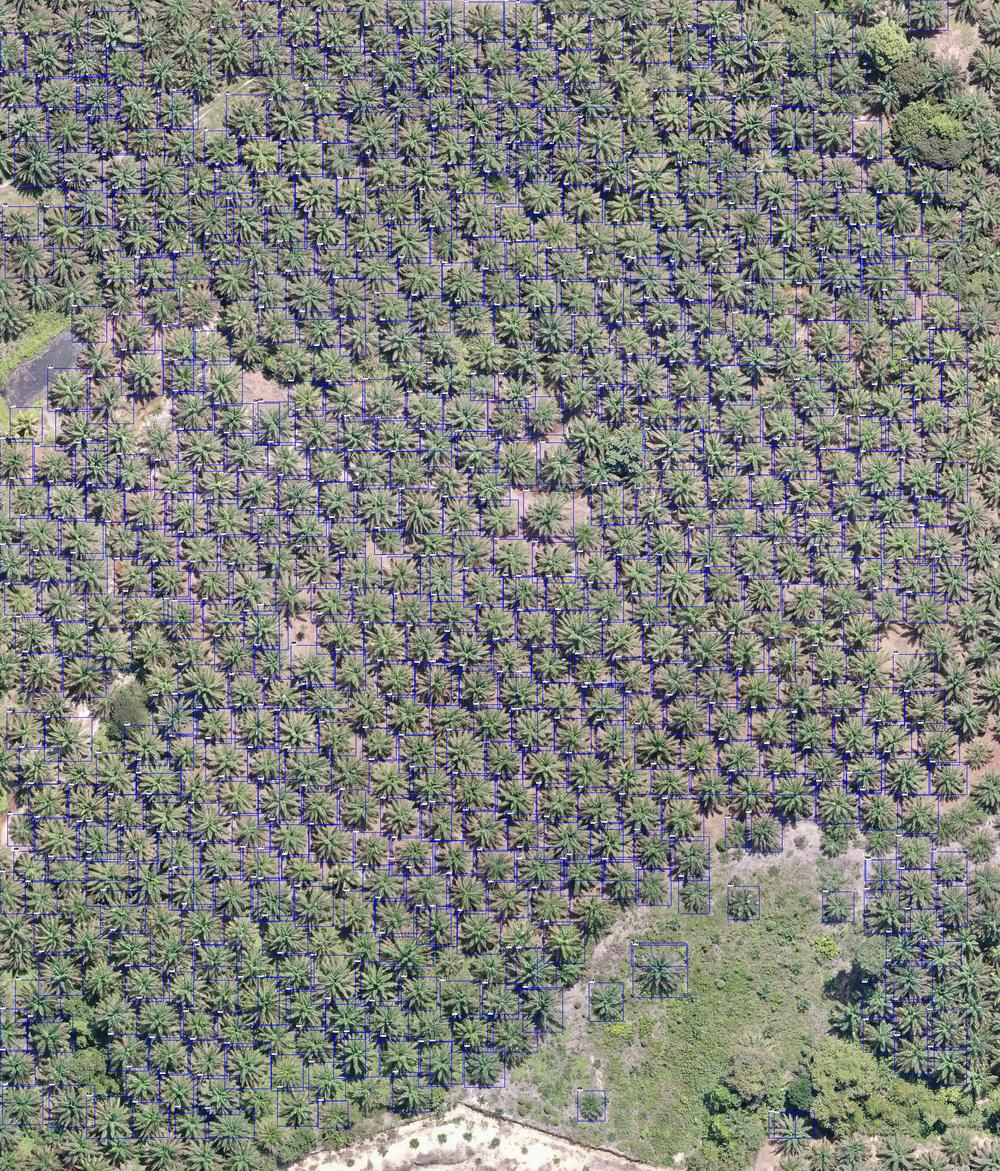

In [13]:
# Result of Detection
IPyImage(filename='/workspace/Aerial-Palm-Tree-Object-Detection/notebooks/experiments/resized_image.jpg', width=600)